# Исследование данных о продаже компьютерных игр

В распоряжении интернет-магазина "Стримчик" данные из открытых источников о продажах игр, включая оценки пользователей и экспертов, а также жанры, платформы и объем продаж в трех регионах: Европе, Северной Америке и Японии. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». 

# Цель, задачи анализа и алгоритм действий

Данное исследование направлено на выявление закономерностей, определяющих успешность игры. Планируется, что полученные выводы позволят интернет-магазину сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


В задачи анализа входит изучить динамику выпуска игр за представленный в архиве период, оценить "срок жизни" игровых платформ, выявить за актуальный период лидеров продаж (как среди платформ, так и среди жанров) и платформы/жанры с наименьшем их объемом, изучить корреляцию между оценками пользователей/критиков и объема продаж, а также составить портреты пользователей в Северной Америке, Европе и Японии. В исследовании также будут проверены гипотезы о средних пользовательских рейтингах платфомр Xbox One и PC, а также жанров Action и Sports.

В ходе анализа данных будут выполнены следующие шаги:

    1) предобработка  данных с целью заполнения пустых значений(где возможно),а также изменения типа данных; 
    2) добавление столбца со значениями глобальных продаж для дальнейшего применения их в анализе;
    3) построение гистограмм для изучения распределения значений выпущенных игр в зависимости от года;
    4) выявление 5 платформ с наибольшими суммарными продажами, а также построение гистограммы (для визуализации распределения значений по годам) и линейного графика (для визуализации динамики продаж) с их значениями в период с 2000 по 2016 гг.; 
    5) изучение средней продолжительности "жизни" платформ при помощи линейного графика и тепловой карты;
    6) выявление актуального приода, на основе которого в дальнейшем будет сделан прогноз на 2017 г.;
    7) построение гистограммы для изучения распределения значений суммарных продаж платформ в акттуальный период (2014-2016 гг.) и линейного графика для исследования динамики средних продаж в тот же период;
    8) построение диаграммы размаха по глобальным продажам игр в актуальный период в разбивке по платформам;
    9)построение графиков для изучения взаимосвязи между глобальными продажами, а также оценками критиков и пользователей;
    10) построение гистограммы для изучения распределения игр по жанрам в актуальный период, а также линейного графика для визуализации динамики продаж в зависимости от жанра;
    11)создание сводных таблиц для выявления топ-5 платформ для каждого отдельного региона и изучения взаимосвязи между рейтингом и продажами, а также построение линейных графиков для изучения динамики продаж в регионах;
    12)построение гистограмм для выявления самых популярных жанров в каждом отдельном регионе; 
    13)построение круговыз диаграм для выявления доли каждой платформы в общих продажах;
    14)проверка гипотез при помощи метода st.ttest_ind().


## Шаг 1. Открытие файла с данными и изучение общей информации

In [1]:
import matplotlib.pyplot as plt #импортируем библиотеку matpolib.byplot для того, чтобы в дальейшем присваивать осям и самим графикам названиям
import pandas as pd #импортируем бибилиотеку pandas для работы с датафреймом
from scipy import stats as st# импортируем библиотеку scipy для статистического анализа
import numpy as np
import seaborn as sns


In [2]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [3]:
import warnings #импортируем библиотеку warnings,чтобы избежать предупреждений при визуализации данных 
warnings.filterwarnings("ignore")


In [4]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data= pd.read_csv('games.csv')


In [5]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Шаг 2.  Подготовка данных

###   Приведение названий столбцов к нижнему регистру

In [7]:
data.columns = map(str.lower, data.columns)

### Изменение типов данных

**Обратимся к уникальным значениям в столбце с оценкой пользователей. Как видно ниже, помимо пропусков типа 'nan' в столбце имеются значения  'tbd'. Они означают "to be determined", т.е. оценка пользователя будет известна позже. В датафрейме 2424 строки с такими значениями. Мы сможем заменить их на пропуски типа 'nan' и в этом же коде изменить тип данных на числовой.**

In [8]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
len(data.loc[data['user_score'] == 'tbd'])#узнаем количество строк со значениями 'tbd' 

2424

In [10]:
len(data.loc[data['user_score'].isna()]) #узнаем количество строк с пустыми значениями до замены значений 'tbd' пропускамм

6701

In [11]:
data['user_score'] = pd.to_numeric(data['user_score'], downcast= 'float', errors='coerce')

In [12]:
data.user_score.unique() #отобразим все уникальные значения в столбце с оценками пользователя чтобы убедиться в отсутствии значений 'tbd'

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7], dtype=float32)

**Количество строк с пропусками в столбце с оценками пользователей увеличилось на 2424. Именно столько ранее было строк со значением 'tbd'.Тип данных изменился на числовой как и задумывалось.**

In [13]:
len(data.loc[data['user_score'].isna()]) 

9125

**Посмотрим, как часто различные категории рейтинга ESRB встречаются в датафрейме.Как видно, игр с рейтингом EC (Early Childhood, т.е. для лиц старше 6 лет) в сотни раз меньше, чем игр с рейтингом E(для всех возрастов). Столь малое количество игр с рейтингом K-A (Kids-to-Adults,т.е. для всех возрастов) связано с тем, что он перестал использоваться в конце 1990-ых; ему на замену пришел рейтинг E. В датафрейме представлено по одной игре с рейтингом AO (Adults Only) и (Rating Pending, т.е. рейтинг еще игре не дан). Удалим строки с ними.**  

In [14]:
data.rating.value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [15]:
data = data.query('rating not in ["EC", "K-A", "AO", "RP"]')

### Изучение пропусков

**Посмотрим визуализацию доли пропущенных значений в столбцах датафрейма от общего числа значений. Как мы видим, в столбцах с оценкой пользователей и рейтингом число пропусков составляет 40 % от всех значений,  в то время как в столбцах с оценками критиков и пользователей - более 50%. В силу этого фактически нет смысла заполнять в них пропуски. Мы также не можем применить логическую индексацию для замены пропусков медианным значением с учетом какого-либо стороннего параметра, так как оценки критиков и пользователей довольно субъективны. В столбце со значениями года выпуска игра пропусков очень мало, в связи с чем смысла заполнять их тоже нет; тем более при попытке заполнить пропуски в нем по значению года выпуска такой же игры существует риск исказить данные, так как разные платформы могут выпускают игры в разные годы.**

In [16]:
def pass_value_barh(data):
    try:
        (
            (data.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(20,6), rot = -5, legend = False, fontsize = 15, color='#66c2a5')
            .set_title('Количество пропусков в датафрейме' + "\n", fontsize = 22)    
        );    
    except:
        print('пропусков не осталось :) ')

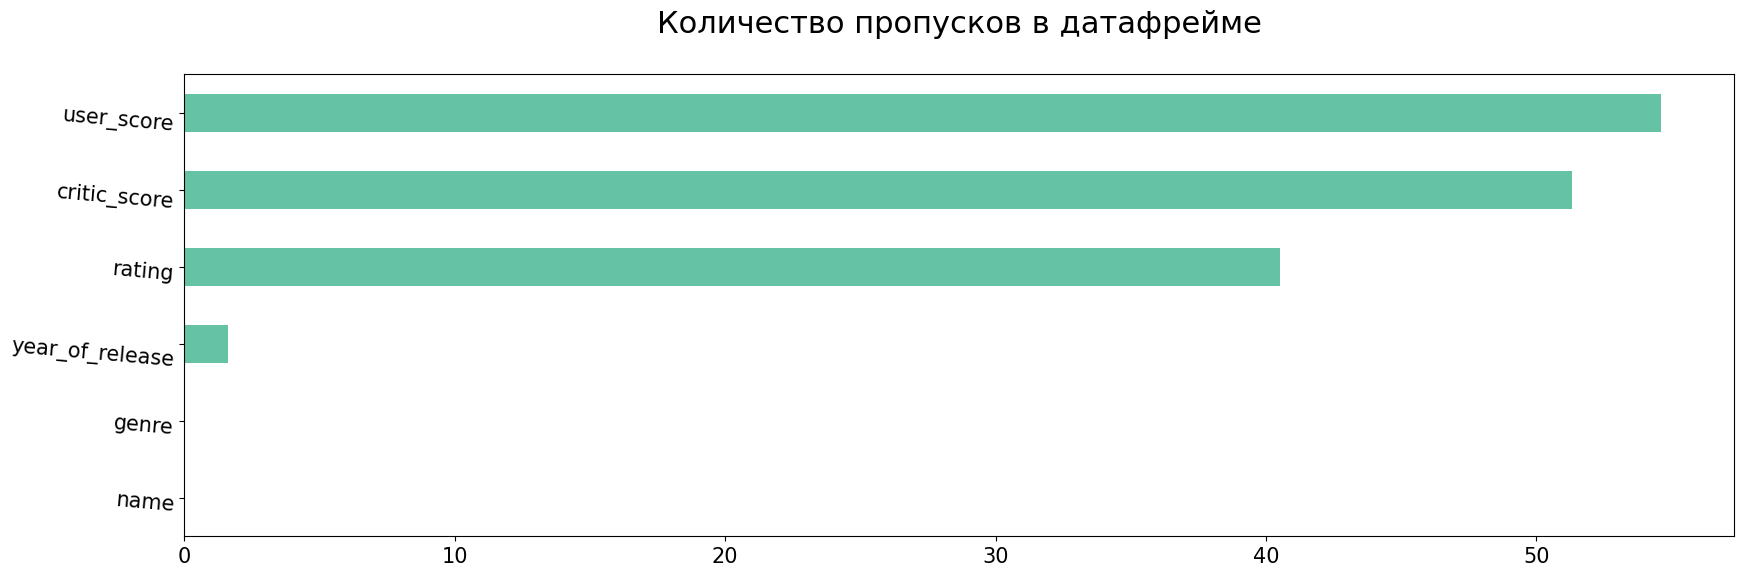

In [17]:
pass_value_barh(data)

In [18]:
data.isna().sum()

name                  2
platform              0
year_of_release     267
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8568
user_score         9117
rating             6766
dtype: int64

**В столбцах с названиями игр и жанра есть 2 пропуска. Как видно ниже, как раз в 2 строк, где отсутствует название игры, также нет жанра. Удалим их.**

In [19]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [20]:
data.dropna(subset=['name'], inplace=True)

**В столбце с годом выпуска 269 пропусков. В случае удаления данных строк мы не рискуем исказить структуру данных.**

In [21]:
data.dropna(subset=['year_of_release'], inplace=True)

In [22]:
data['year_of_release'] = data['year_of_release'].astype('int', errors='ignore') 

**Изменить тип данных получится только после удаления пропусков, так как пропуски nan имеют тип object; они бы не дали изменить тип.**

In [23]:
data.reset_index()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16426,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16427,16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16428,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16429,16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Добавление столбца с суммарными продажами во всех регионах

In [24]:
data['total_sales'] = data[['na_sales', 'eu_sales','jp_sales','other_sales']].sum(axis=1)

## Шаг 3. Исследовательский анализ данных

**Посмотрим, сколько игр выпускалось в каждый год.**

In [25]:
data.groupby('year_of_release')['name'].nunique()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      40
1992      41
1993      59
1994     117
1995     215
1996     257
1997     280
1998     364
1999     326
2000     325
2001     428
2002     631
2003     546
2004     550
2005     656
2006     773
2007     884
2008    1039
2009    1000
2010     900
2011     777
2012     446
2013     335
2014     319
2015     362
2016     297
Name: name, dtype: int64

**В исследовании будет использоваться палитра Set2. Получим коды включенных в нее цветов с целью дальнейшего их использования для визуализации данных.**

In [26]:
print(sns.color_palette('Set2').as_hex())

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


In [27]:
sns.color_palette('Set2').as_hex()

['#66c2a5',
 '#fc8d62',
 '#8da0cb',
 '#e78ac3',
 '#a6d854',
 '#ffd92f',
 '#e5c494',
 '#b3b3b3']

**Велика вероятность того, что в один и тот же год одна и те же игра была выпущена на несколько платформах. Проверим это и посмотрим гистограммы с учетом этого обстоятельства.**

In [28]:
data_grouped = data.groupby(['year_of_release', 'name']).agg({'platform': ['count']}).reset_index()
data_grouped.tail(20)

,year_of_release,name,platform
,,,count
12168,2016,Valentino Rossi: The Game,3
12169,2016,Valkyria Chronicles,1
12170,2016,WWE 2K17,4
12171,2016,Wand of Fortune R,1
12172,2016,Warhammer: The End Times - Vermintide,1
12173,2016,Watch Dogs 2,2
12174,2016,Winning Post 8 2016,2
12175,2016,World of Final Fantasy,2
12176,2016,World of Warcraft: Legion,1


**Как видно на графике, нет существенных различий при учете одновременного выхода игр на нескольких платформах.**

**С 1995 по 2008 гг. наблюдался восходящий тренд: с каждым годом выпущенных игр становилось больше. C 2009 г. началось снижение темпов выпуска игр; возможно, оно было вызвано "великой рецессией" 2007-2008 гг. В 2013-2016 гг. количество выпущенных игр было таким же, как и в 1999-2000 гг.**

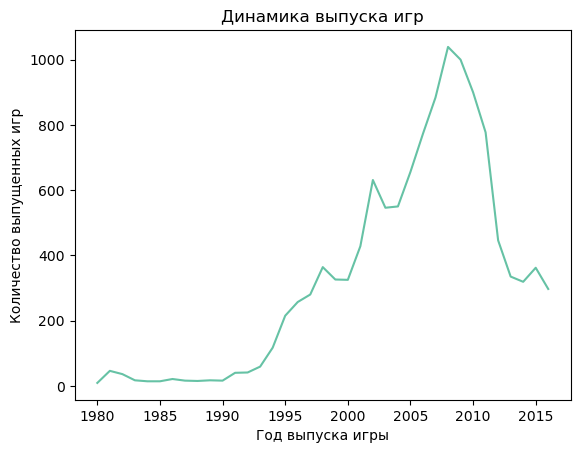

In [29]:
games_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='nunique').reset_index()
sns.lineplot(data=games_per_year, x='year_of_release', y='name', color = '#66c2a5', \
             ci=None, markers=True,dashes=False);
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество выпущенных игр')
plt.title('Динамика выпуска игр')
plt.show();

In [30]:
data.platform.value_counts().head()

PS2     2126
DS      2119
PS3     1306
Wii     1284
X360    1232
Name: platform, dtype: int64

### Динамика продаж по платформам в период с 2000 по 2016 гг.

**В период с 2000 по 2005 гг. лидером продаж являлась платформа PS2.В 2006 г. в лидеры по продажам вырвалась платформа Wii; она достигла пика своей популярности в 2009 г. Общий объем продаж у Wii в тот год был примерно на 40 % больше, чем у других платформ. В 2010 г. наибольшего объема продаж достигла платформа X360,однако уже в следующем году она утратила лидерскую  позицию в пользу платформы PS3. В 2012 г.X360 вернулась на первое место по объему продаж, однако отрыв от X360 составлял менее 1 %.В 2013 г. PS3 снова обогнала X360. В 2014 г. произошло сокращение (в 2 раза) объема продаж у всех из рассматриваемых платформ: на протяжении 2014-2016 гг. PS3 сохраняла лидерство по продажам.**

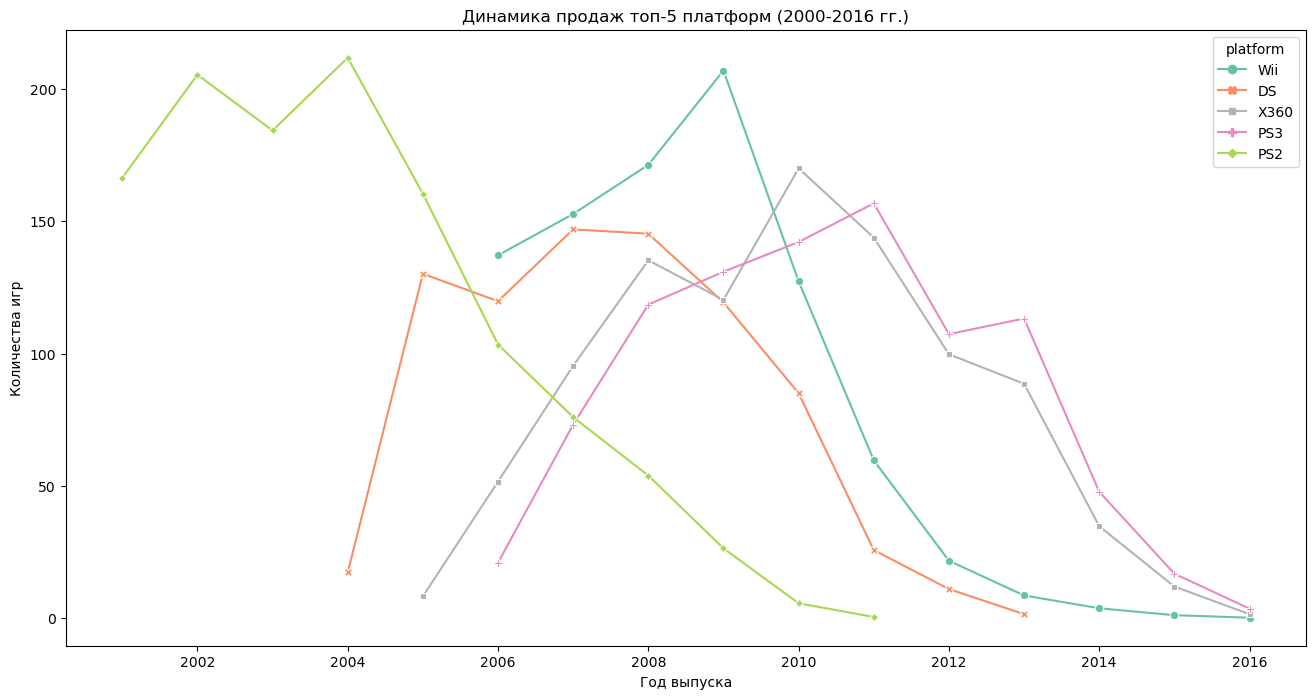

In [31]:
plt.figure(figsize=(16,8))

palette = ['#66c2a5', '#fc8d62', '#b3b3b3', '#e78ac3', '#a6d854']

top_five_platforms = data.query('platform in ["PS2", "DS", "PS3", "Wii", "X360"] and year_of_release > 2000')

sns.lineplot(data=top_five_platforms, x='year_of_release', y='total_sales',\
             hue='platform', estimator='sum', style='platform', palette=palette,\
             ci=None, markers=True,dashes=False)
plt.xlabel('Год выпуска')
plt.ylabel('Количества игр')
plt.title('Динамика продаж топ-5 платформ (2000-2016 гг.)')
plt.show();

**Изучим среднюю продолжительность "жизни" платформы.**

**Как видно на тепловой карте и линейном графике, в среднем продолжительность "жизни" платформ составляет около 10 лет. Учтем это обстоятельство при выборе актуального периода.**

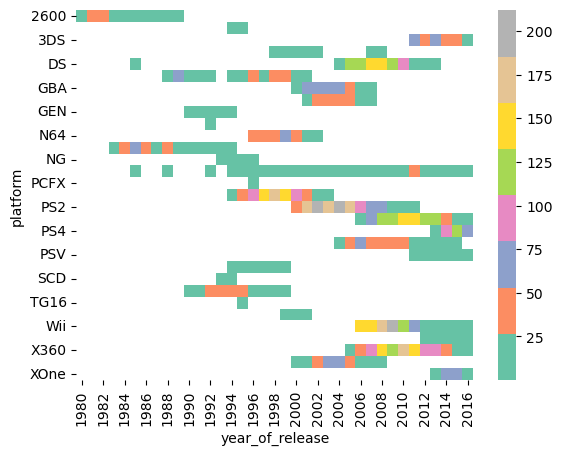

In [32]:
pivot = data.pivot_table(
    index=['platform'],
    columns=['year_of_release'],
    values='total_sales',
    aggfunc=np.sum)
    
sns.heatmap(pivot, cmap='Set2');


**У платоформы DS странный выброс в 1985 году. Удалим из датафрейма строки, где у нее указан этот год.**

In [33]:
data[data['platform'] == 'DS'] = data.query('platform == "DS" and year_of_release > 2000')
DS = data.query('platform == "DS"')
DS.year_of_release.unique()

array([2006., 2005., 2010., 2009., 2004., 2007., 2012., 2008., 2011.,
       2013.])

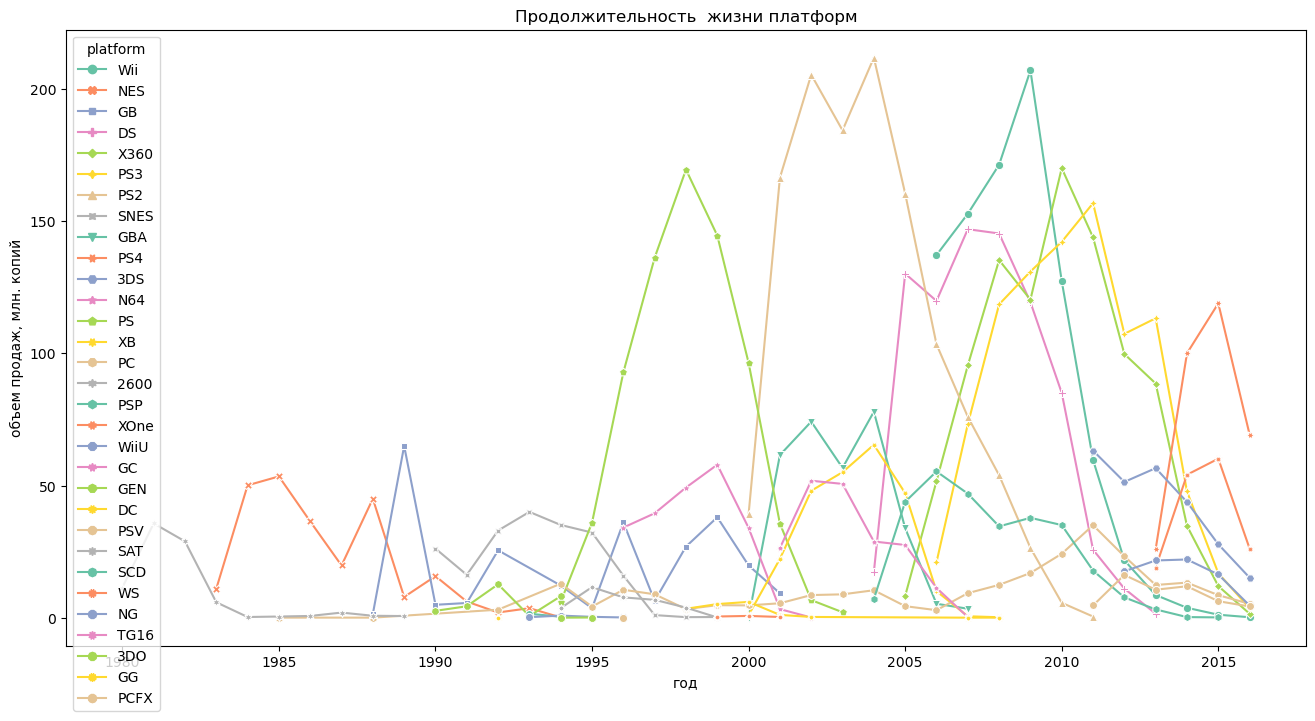

In [34]:
plt.figure(figsize=(16,8))
sns.lineplot(data=data, x='year_of_release', y='total_sales',\
             hue='platform', estimator='sum', style='platform', \
             ci=None, markers=True,dashes=False, palette='Set2')
plt.title('Продолжительность  жизни платформ'),
plt.xlabel('год'),
plt.ylabel('объем продаж, млн. копий');

### Выбор актуального периода

**В качестве актуального периода в исследовании выбраны 2014-2016 гг. Выбирая данный период, мы, во-первых, в меньшей степени рискуем строить прогнозы на основании данных платформ, которые в скором времени перестанут работать.Во-вторых, замечен нисходящий тренд начиная с 2012 г., в связи с чем в анализе важно учесть именно те года, которые относятся к этому тренду. Кроме того, если прогнозируются продажи на 2017 г.,будет логичным анализировать продажи в предшествующие несколько лет.** 

In [35]:
data_new  = data.query('year_of_release >  2013')
data_new.reset_index()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
3,77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
1685,16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
1686,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
1687,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [36]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   float64
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float32
 10  rating           940 non-null    object 
 11  total_sales      1689 non-null   float64
dtypes: float32(1), float64(7), object(4)
memory usage: 164.9+ KB


In [37]:
data_new['year_of_release'] = data_new['year_of_release'].astype('int', errors='ignore') 

### Динамика продаж по платформам за актуальный период

**Сначала построим гистограмму для выявления платформ с самыми высокими объемами продаж в актуальный период. Как видно ниже,  лидерами по суммарным продажам в 2014-2016 гг. были PS4, Xbox One, 3DS, PS3, X360. Учитывая, что средняя продолжительность "жизни" платформ составляет около 10 лет, некоторые из лидеров актуального периода могут утратить свою актуальность уже в 2017.**

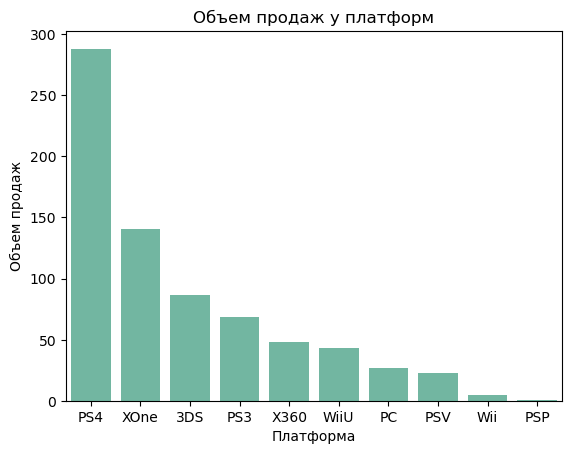

In [38]:
sales_per_platform = data_new.pivot_table(index='platform', 
                                          values='total_sales',
                                          aggfunc='sum').sort_values(by='total_sales',ascending=False).reset_index()
sns.barplot(data=sales_per_platform, x='platform', y='total_sales', color = '#66c2a5')
plt.xlabel('Платформа')
plt.ylabel('Объем продаж')
plt.title('Объем продаж у платформ')
plt.show();

**В актуальный период самые высокие средние продажи были у PS4, Xbox One, WiiU, Wii и X360**.

In [39]:
data_new.pivot_table(index='platform', values='total_sales').sort_values(by='total_sales', ascending=False).head()

,total_sales
platform,
PS4,0.766356
XOne,0.615614
WiiU,0.588767
Wii,0.460909
X360,0.434414


**Посмотрим на показатели среднего объема продаж в разные периоды актуального периода.Как видно,  с учетом динамики по объему средних продаж выделяются все те же платформы: 3DS, PS4, Wii, WiiU и Xbox One.**

In [40]:
data_new.pivot_table(index='platform', columns='year_of_release', values='total_sales')

year_of_release,2014,2015,2016
platform,,,
3DS,0.547000,0.323023,0.329130
PC,0.282553,0.170400,0.097222
PS3,0.442222,0.230411,0.094737
PS4,1.333333,0.867883,0.422256
PSP,0.024000,0.040000,NaN
PSV,0.119000,0.056818,0.050000
Wii,0.625000,0.285000,0.180000
WiiU,0.710645,0.583929,0.328571
X360,0.551429,0.341714,0.116923


**Обратимся к графику, отражающему иднамику изменения среднего объема продаж в период с 2014 по 2016 гг. Как видно ниже, все платформы за исключением 3DS столкнулись с непрекращающимся сокращением среднего объема продаж. Лидером по среднему объему продаж на протяжении всего периода является PS4, однако ее отрыв к 2016 г. был почти в 3 раза меньше, чем в 2014 г.; ее показатели приблизились к WiiU, Xbox One и PSP. 
   Несмотря на то, что в 2014 г. Xbox One занимала второе место по среднему объему продаж, к окончанию актуального периода вследствие резкого падения данная платформа была на 4 месте. Иначе ситуация сложилась для WiiU, которой на протяжении всего времени не только удалось остаться в топ-3, но еще и обогнать по средним продажам Xbox One в 2016 г. 
  Средний объем продаж платформ PSV и PSP был на примерно одном и том же уровне на протяжении всего актуального периода.
  Поскольку латформа PSP была выпущена в начале 2000-ых гг., ее продажи прекратились в 2015 г.**

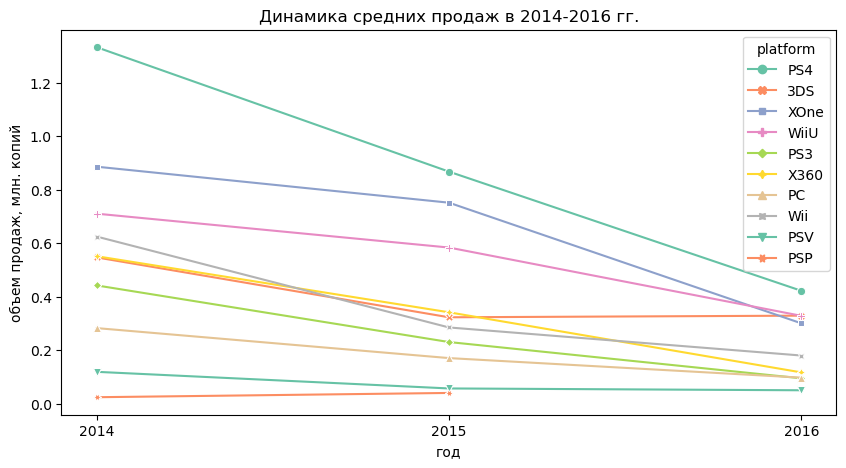

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=data_new, x='year_of_release', y='total_sales',\
             hue='platform', estimator='mean', style='platform', \
             ci=None, markers=True,dashes=False, palette='Set2')
ax.set_xticks(range(2014,2017))
plt.title('Динамика средних продаж в 2014-2016 гг.'),
plt.xlabel('год'),
plt.ylabel('объем продаж, млн. копий');

**После представления общей картины средних продаж изучим динамику самых важных платформ. Возьмем во внимание не только актуальный период, но и все годы, когда платформы были актуальны. Это поможет при решении,какие из них в наибольшей степени могут быть прибыльными в 2017 г., а какие - вообще рискуют утратить актуальность.**

**Платформа PS4 появилась на рынке в 2013 г. Она была лидером по среднему объему продаж в актуальный период. Снижение продаж практически протекало линейно; за актуальный период их объем сократился на 0.9 млн копий.На момент окончания актуального периода средний объем продаж составлял около 0.43 млн. копий, что является самым высоким показатеем среди всех сравниваемых платформ.** 

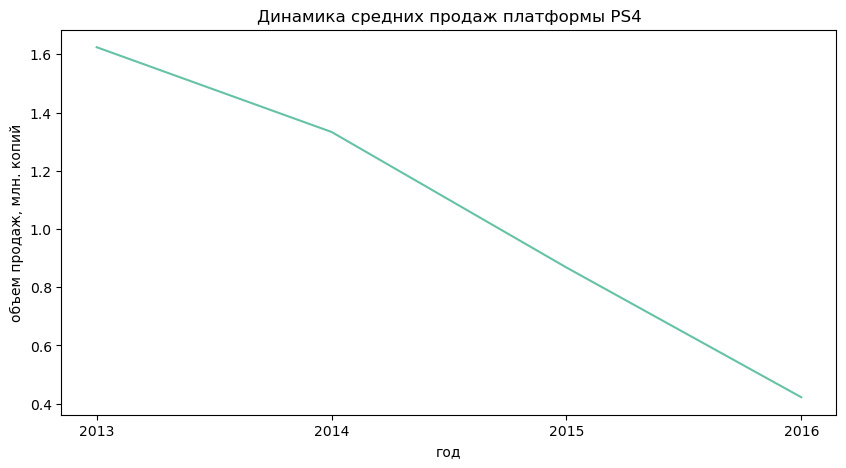

In [42]:
PS4 = data.query('platform == "PS4"')
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=PS4, x='year_of_release', y='total_sales',\
             estimator='mean', ci=None, markers=True,dashes=False, color='#66c2a5'),
ax.set_xticks(range(2013,2017)),
plt.title('Динамика средних продаж платформы PS4'),
plt.xlabel('год'),
plt.ylabel('объем продаж, млн. копий');

**Платформа Xbox One появилась в 2013 г., т.е. за год до обозначенного в исследовании актуального периода. На протяжении 2014 происходило постепенное снижение среднего объема продаж. Темпы снижения резко ускорились в 2015 г., в связи с чем средний объем продаж сократился с 0.75 млн. до 0.3 млн копий.**

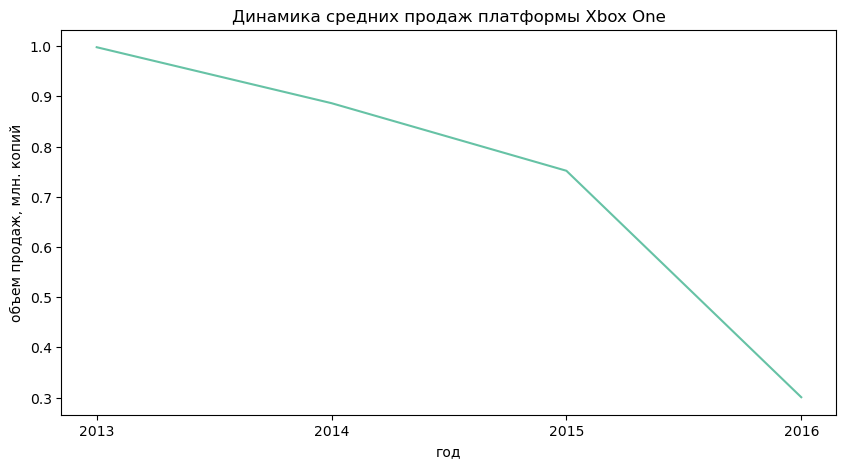

In [43]:
xbox_one = data.query('platform == "XOne"')
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=xbox_one, x='year_of_release', y='total_sales',\
             estimator='mean', ci=None, markers=True,dashes=False, color='#66c2a5'),
ax.set_xticks(range(2013,2017)),
plt.title('Динамика средних продаж платформы Xbox One'),
plt.xlabel('год'),
plt.ylabel('объем продаж, млн. копий');

**Платформа WiiU занимает третье место по объему средних продаж в актуальный период. Она появилась в 2012 г.; в начале актуального периода объем ее средних продаж составил около 0.7 млн. копий, а в 2015 г. - он сократился до 0.56 млн. копий. В  течение 2015 г. темпы снижения продаж ускорились, в связи с чем в начале 2016 г. их объем составил менее 0.2 млн копий.**

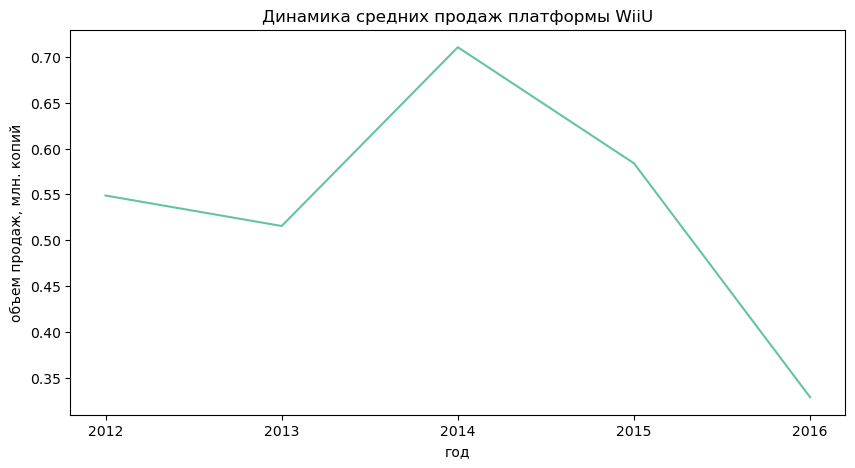

In [44]:
WiiU = data.query('platform == "WiiU"')
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=WiiU, x='year_of_release', y='total_sales',\
             estimator='mean', ci=None, markers=True,dashes=False, color='#66c2a5'),
ax.set_xticks(range(2012,2017)),
plt.title('Динамика средних продаж платформы WiiU'),
plt.xlabel('год'),
plt.ylabel('объем продаж, млн. копий');

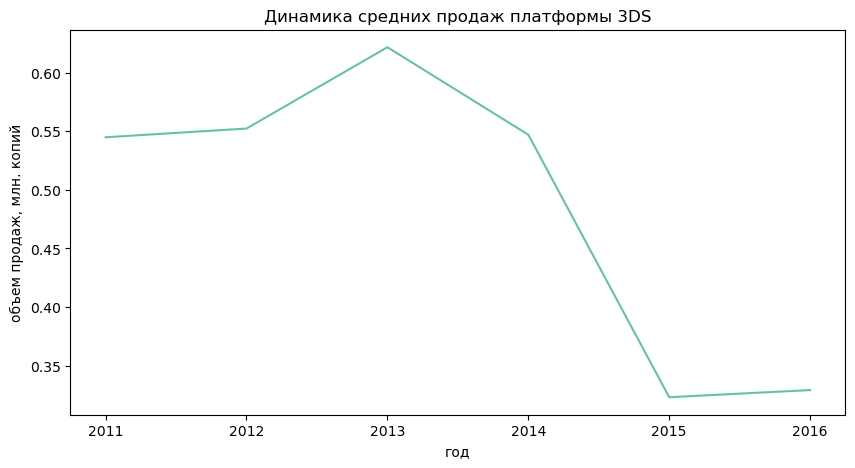

In [45]:
three_DS = data.query('platform == "3DS"')
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=three_DS, x='year_of_release', y='total_sales',\
             estimator='mean', ci=None, markers=True,dashes=False, color='#66c2a5'),
plt.title('Динамика средних продаж платформы 3DS'),
plt.xlabel('год'),
plt.ylabel('объем продаж, млн. копий');

**Платформа Wii была запущена в 2006 г. Несмотря на то, что она была актуальна на протяжении всего актуального периода, существует риск, что она перестанет работу в 2017 г. в силу того, что средняя продолжительность "жизни" платформ составялет около 10 лет. При этом средний объем ее продаж в конце актуального периода составил 0.2 млн. копий, и на протяжении  последних 9 лет после резкого падение объема средних продаж ситуация с продажами у платформы была относительно стабильная.**

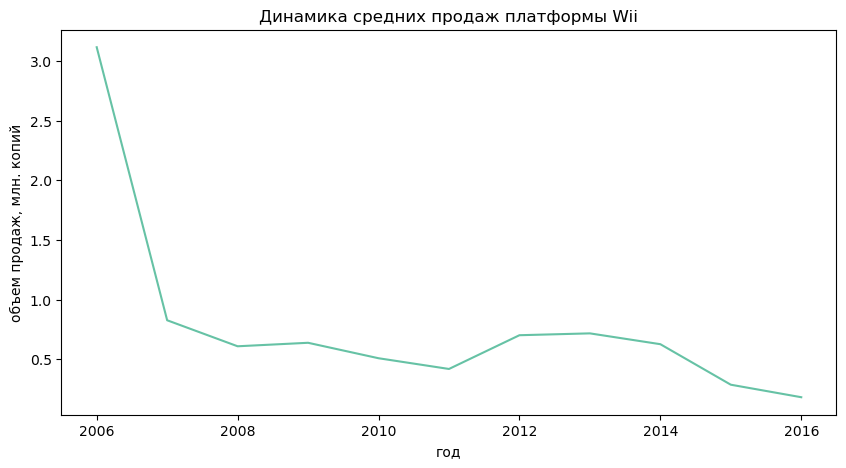

In [46]:
wii = data.query('platform == "Wii"')
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=wii, x='year_of_release', y='total_sales',\
             estimator='mean', ci=None, markers=True,dashes=False, color='#66c2a5'),
plt.title('Динамика средних продаж платформы Wii'),
plt.xlabel('год'),
plt.ylabel('объем продаж, млн. копий');

**Платформа PC просуществовала 30 лет: c 1985 по 2015 гг. В связи с этим нельзя категорично заявить о том, что уже в 2017 г. Wii точно исчезнет с рынка.**

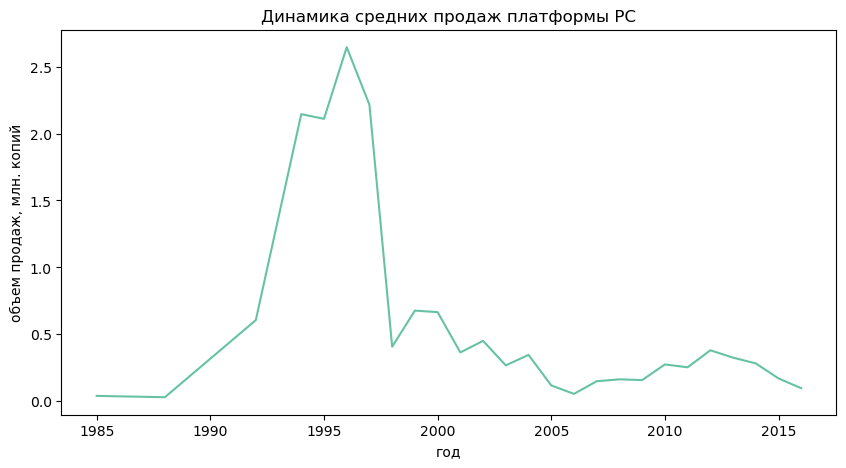

In [47]:
pc = data.query('platform == "PC"')
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=pc, x='year_of_release', y='total_sales',\
             estimator='mean', ci=None, markers=True,dashes=False, color='#66c2a5'),
plt.title('Динамика средних продаж платформы PC'),
plt.xlabel('год'),
plt.ylabel('объем продаж, млн. копий');

**Платформа X360 была выпущена в середине 2005 г. Продажи были нестабильными до 2013 г.: платформа сталкивалась то с ростом продаж, то с их сокращением. в 2013 г. четко обозначился тренд на сокращение продаж; это происходило в рамках общего сокращения продаж на рынке. В начале актуального периода средний объем продаж составлял около 0.5 млн. копий, в то время как к началу 2016 г. - около 0.15 млн.**

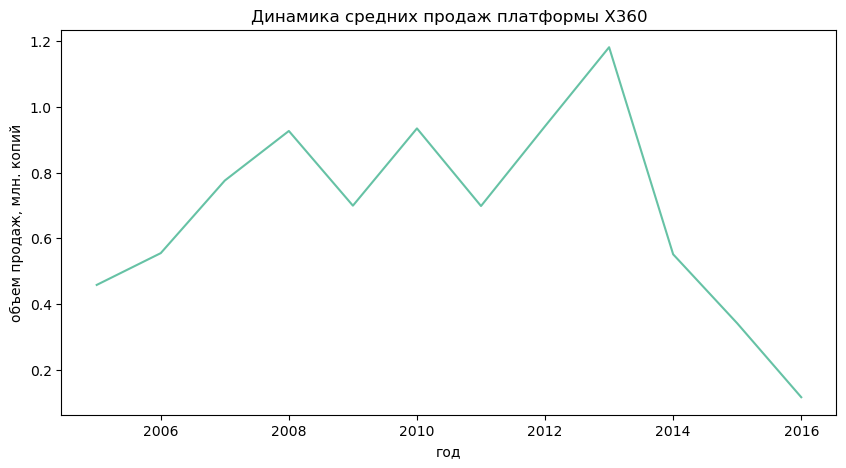

In [48]:
x360 = data.query('platform == "X360"')
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=x360, x='year_of_release', y='total_sales',\
             estimator='mean', ci=None, markers=True,dashes=False, color='#66c2a5'),
plt.title('Динамика средних продаж платформы X360'),
plt.xlabel('год'),
plt.ylabel('объем продаж, млн. копий');

**Теперь посмотрим на динамику суммарных продаж. Как и в случае средних продаж лидирует платформа PS4 сохраняет лидерство на протяжении всего рассматриваемого периода. Также с каждым годом наблюдается снижение продаж у 3DS, X360, WiiU и PS3. XboxOne сохранила второе место по суммарным продажам на протяжении всего акутального периода, и темпы снижения суммарных продаж у нее были существенно ниже, чем у остальных платформ. Нет ни одной платформы, у которой в рассматриваемый период произошел рост суммарных продаж.**

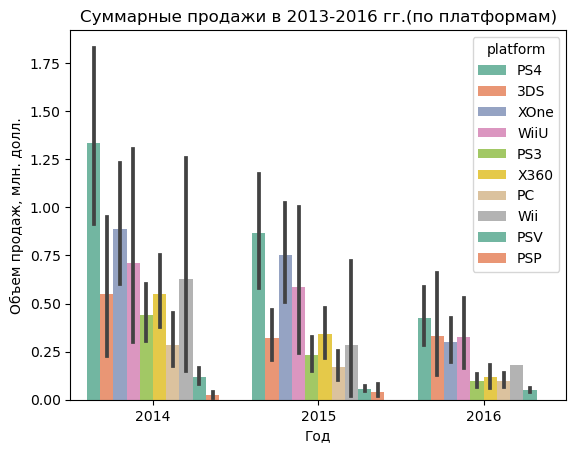

In [49]:
sns.barplot(data=data_new, x='year_of_release', y='total_sales', hue='platform', palette='Set2')
plt.xlabel('Год')
plt.ylabel('Объем продаж, млн. долл.')
plt.title('Суммарные продажи в 2013-2016 гг.(по платформам)')
plt.show();

### Прогноз на 2017 г.

**Поскольку суммарные продажи больше указывают не на качество, а на количество, при прогнозировании самых перспективных платформ в большей мере стоит опираться на данные о продажах средних. Однако визуализация данных о суммарных продажа в нашем случае подкрепляет выводы о некоторых платформах (за исключением Wii, которая по суммарным продажам занимает 7-е место). Основываясь на приведенных выше комментариях, можно определить самые перспективные платформы на 2017 г. Ими являются PS4, 3DS, Xbox One, WiiU, а также Wii.**

### Диаграмма размаха по глобальным продажам игр в разбивке по платформам

**На диаграмме видно, что у большинства платформ (PS3, PS4, Xbox One, WiiU, Wii, а также X360) почти совпадает медианное значение. Первый квартиль у большинства платформ лежит на уровне 0.1 млн. Это можно объяснить тем, что топовых игр не так много, и выходят они в реальности почти каждый день.**

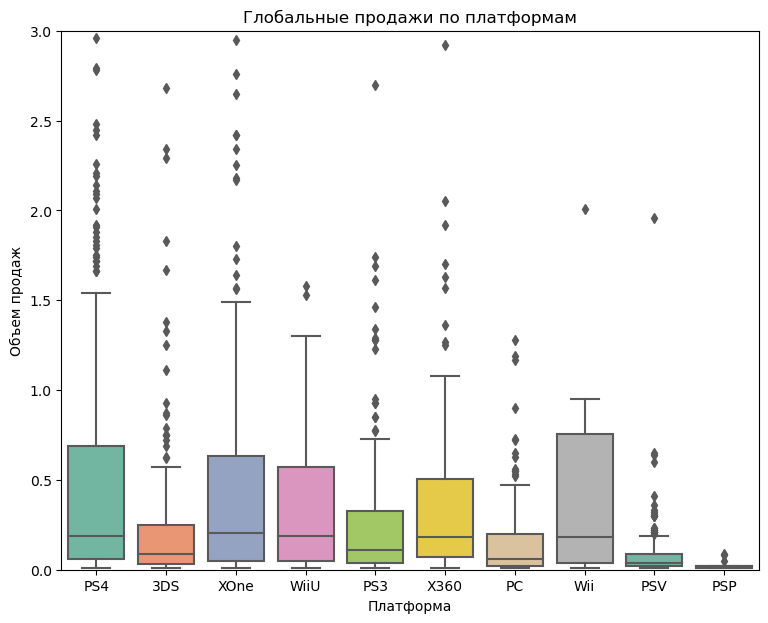

In [50]:
palette = sns.color_palette('Set2')

fig, ax = plt.subplots(figsize=(9,7))

sns.boxplot(x='platform', y='total_sales', data=data_new, palette=palette)

plt.title('Глобальные продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Объем продаж')
plt.ylim(0, 3.0)
plt.show();

**Дополнительно отразим диаграмму размаха с учетом всех выбросов.**

**Видно, что из прогнозируемых перспективных платформ самыми стабильными являются Wii и WiiU; у них наименьшее число выбросов по сравнению с другими платформами. Больше всего аномально высоких значений выявлено у платформы PS4: в этом стоит искать причину столь большого отрыва от остальных платорм по суммарным продажам.**

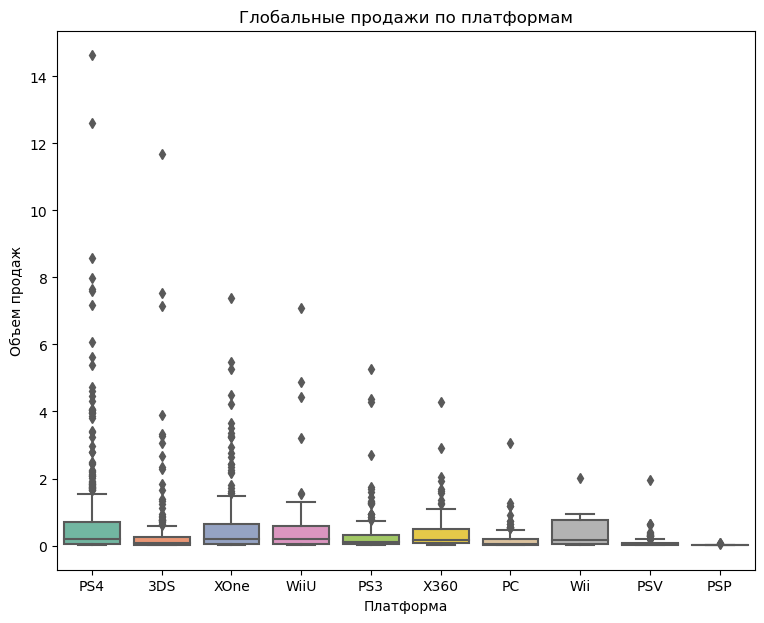

In [51]:
palette = sns.color_palette('Set2')

fig, ax = plt.subplots(figsize=(9,7))

sns.boxplot(x='platform', y='total_sales', data=data_new, palette=palette)

plt.title('Глобальные продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Объем продаж')
plt.show();

### Анализ взаимосвязи между отзывами и общим объемом продаж

**Как видно на графике, между объемом продаж и отзывами критиков существует связь, но она не досточно сильная.  Действительно, если объем продаж составляет более 4 млн. копий, то рейтинг выше 60. При этом есть очень много игр, у которых несмотря на низкие продажи (0.1-1 млн. копий), высокий рейтинг.**

**Практически отсутствует корреляция между пользовательским рейтингом и объемом продаж. Игры как с низкими (0.1 млн. копий), так и с высокими (1-10 млн. копий) имеют высокий рейтинг. Однако имеются случаи, когда у платформ с низкими продажами рейтинг был низким, в связи с чем незначительная взаимосвязь имеется.** 

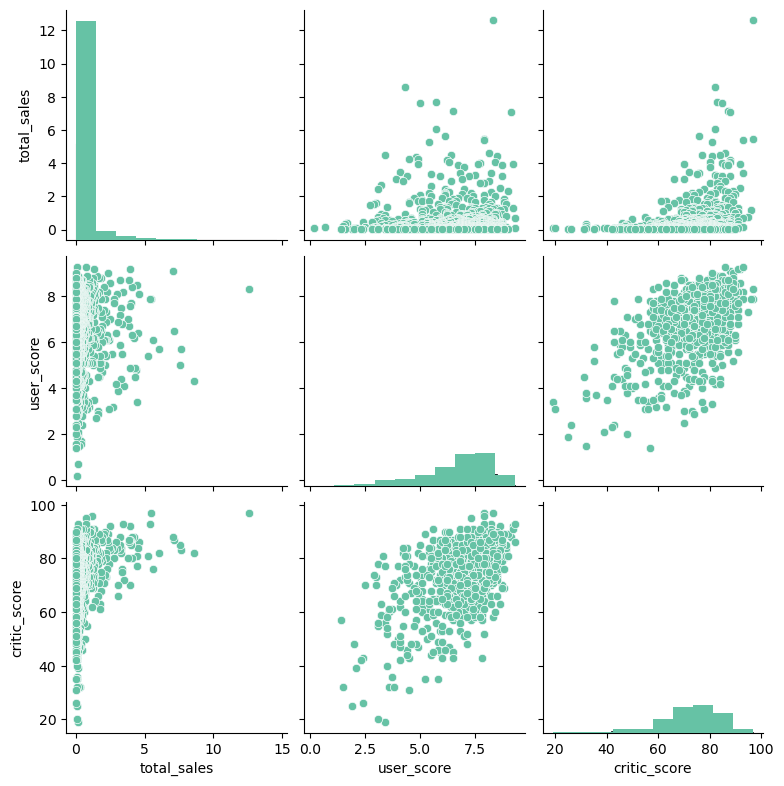

In [52]:
g = sns.pairplot(data_new[['total_sales', 'user_score', 'critic_score']])
g.map_upper(sns.scatterplot,color='#66c2a5')
g.map_lower(sns.scatterplot, color='#66c2a5')
g.map_diag(plt.hist, color='#66c2a5')
plt.gcf().set_size_inches(8,8);

In [53]:
data_new['total_sales'].corr(data_new['critic_score']) #рассчитаем коэфицент корреляции между общим объемом продаж и отзывами критиков

0.32810508696636315

In [54]:
data_new['total_sales'].corr(data['user_score']) #рассчитаем коэфицент корреляции между общим объемом продаж и отзывами рользователей

-0.013070306761877377

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы критиков и пользователей.**

In [55]:
one_platform = data_new.query('platform=="WiiU"')

**В случае платформы WiiU имеется взаимосвязь между объемом продаж и рейтингом критиков, однако она недостаточно сильная. Игры, у которых объем продаж менее 1 млн. копий имеют такой же рейтинг как и те, которых было продано в несколько раз больше. При этом все же самый низкий пользовательский рейтинг у игр с наименьшим объемом продаж: по этой причине существует взаимосвязь.** 

In [56]:
one_platform['total_sales'].corr(one_platform['critic_score'])

0.37020141248088406

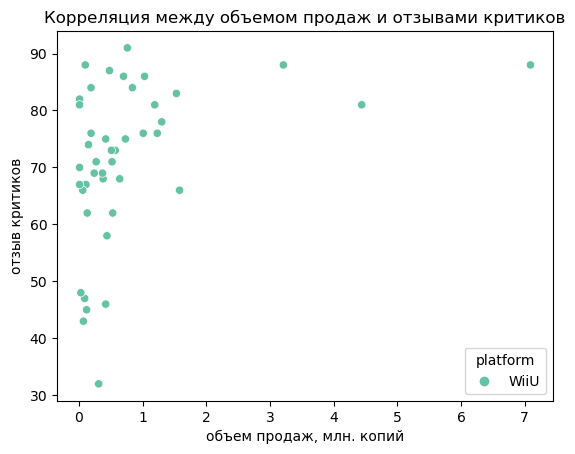

In [57]:
sns.scatterplot(data=one_platform, x='total_sales', y='critic_score', hue='platform', palette='Set2')
plt.title('Корреляция между объемом продаж и отзывами критиков')
plt.xlabel('объем продаж, млн. копий')
plt.ylabel('отзыв критиков')
plt.show();


In [58]:
platforms = data_new.query('platform != "WiiU"')


**У платформы WiiU и остальных схожи коэфицент корреляции. У платформ PS4 и 3DS коэффицент составляет 0.39, в то время как у Xbox One, PC и PSV - около 0.42. При этом в случае платформ X360 и PC взаимосвязь между общими продажами и оценками критиков практически отсутствует: коэфицент составляет около 0,169; у платформы PSV он вообще составляет 0.042, т.е. корреляции практически нет. Факт  практичевкого отсутвия корреляции у PC, X360 и PSV не дает нам утверждать, что в актуальный период существовала общая тенденция продаж. При это, однако, стоит отметить, что у прогнозируемо перспективных платформ корреляция самая высокая.**

In [59]:
platforms['total_sales'].corr(platforms['critic_score'])

0.3260274955865736

**Как видно на интерактивных графиках, у всех рассматриваемых платформ есть игры, которые несмотря на их низкий объем продаж, получили от критиков высокие оценки. При этом все же самый низкий рейтинг у игр с наименьшим объемом продаж.**

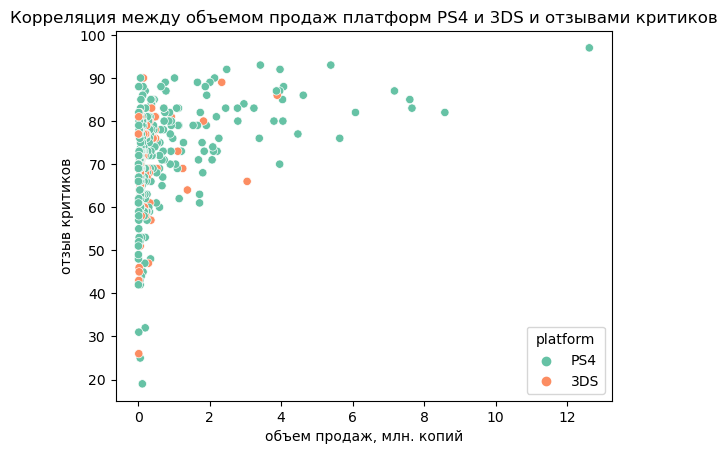

In [60]:
ps4_and_3ds = data_new.query('platform in ["PS4", "3DS"]')

sns.scatterplot(data=ps4_and_3ds, x='total_sales', y='critic_score', hue='platform', palette='Set2')
plt.title('Корреляция между объемом продаж платформ PS4 и 3DS и отзывами критиков')
plt.xlabel('объем продаж, млн. копий')
plt.ylabel('отзыв критиков')
plt.show();

In [61]:
ps4_and_3ds['total_sales'].corr(ps4_and_3ds['critic_score'])

0.3898220327256338

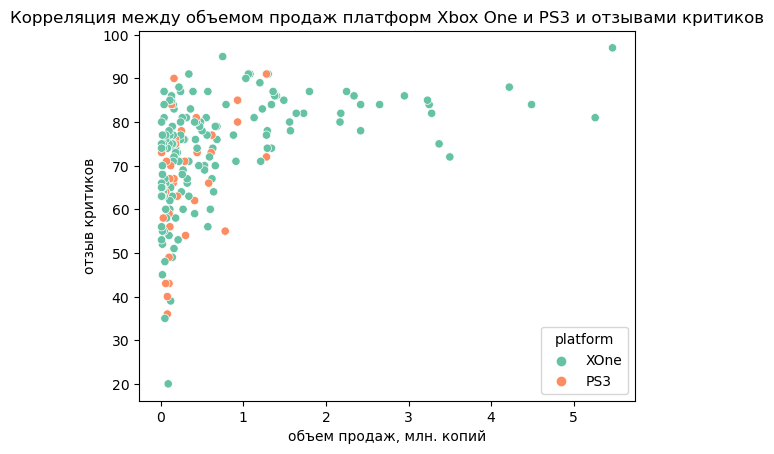

In [62]:
xone_and_ps3 = data_new.query('platform in ["XOne", "PS3"]')
                              
sns.scatterplot(data=xone_and_ps3, x='total_sales', y='critic_score', hue='platform', palette='Set2')
plt.title('Корреляция между объемом продаж платформ Xbox One и PS3 и отзывами критиков')
plt.xlabel('объем продаж, млн. копий')
plt.ylabel('отзыв критиков')
plt.show();

In [63]:
xone_and_ps3['total_sales'].corr(xone_and_ps3['critic_score'])

0.4293565417772298

**Два ниже приведенных графика демонстрируют, что в актуальный период были платформы, у которых практически отсутствовала корреляция.**

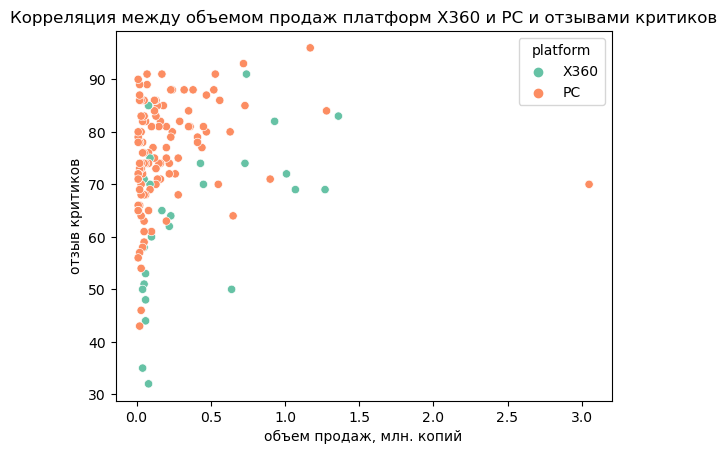

In [64]:
x360_and_pc = data_new.query('platform in ["X360", "PC"]')

sns.scatterplot(data=x360_and_pc, x='total_sales', y='critic_score', hue='platform', palette='Set2')
plt.title('Корреляция между объемом продаж платформ X360 и PC и отзывами критиков')
plt.xlabel('объем продаж, млн. копий')
plt.ylabel('отзыв критиков')
plt.show();

In [65]:
x360_and_pc['total_sales'].corr(x360_and_pc['critic_score'])

0.16921485743909093

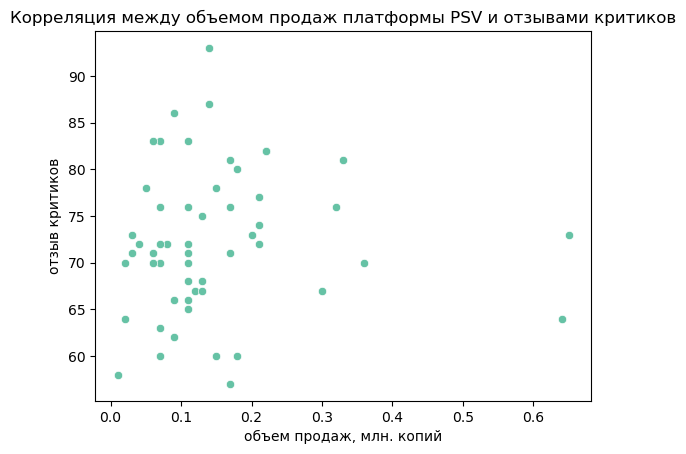

In [66]:
psv = data_new.query('platform in "PSV"')

sns.scatterplot(data=psv, x='total_sales', y='critic_score', palette='Set2', color= '#66c2a5')
plt.title('Корреляция между объемом продаж платформы PSV и отзывами критиков')
plt.xlabel('объем продаж, млн. копий')
plt.ylabel('отзыв критиков')
plt.show();

In [67]:
psv['total_sales'].corr(psv['critic_score'])

0.04266490657009527

### Анализ корреляции между пользовательским рейтингом и объемом продаж

**В случае платформы WiiU корреляция между отзывами пользователей и объемом продаж выше, чем в случае рейтинга критиков. Однако данная связь также не достаточно сильная. Несмотря на то, что по мере роста объема становится меньше игр с низким рейтингом, у достаточно большого количества игр с низким объемом продаж оценки такие же высокие как и в случае игр c боьшим объемом продаж.** 

In [68]:
one_platform['total_sales'].corr(one_platform['user_score'])

0.4079264698680882

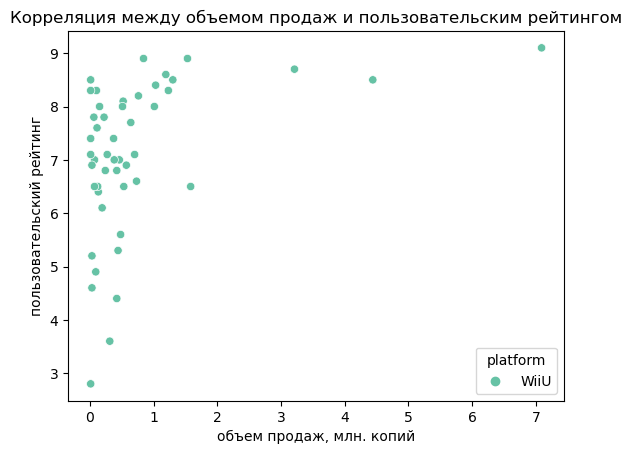

In [69]:
sns.scatterplot(data=one_platform, x='total_sales', y='user_score', hue='platform', palette='Set2')
plt.title('Корреляция между объемом продаж и пользовательским рейтингом')
plt.xlabel('объем продаж, млн. копий')
plt.ylabel('пользовательский рейтинг')
plt.show();

**В случае остальных платформ корреляция между пользовательским рейтингом и объемом продаж отрицательная. На интерактивых  графиках видно, что в случае некоторых платформ (например, PS3, X360, PS4 и Xone) по мере снижения объема продаж происходит повышение пользовательских оценок. При этом поскольку у игр с наименьшим количеством проданных копий рейтинги самые низкие, связь носит сильно ограниченный характер. Таким образом, практически отсутсвует взаимосвязь между объемом продаж и рейтингом пользователей: она существует для одной из наиболее прибыльных платформ WiiU.**

In [70]:
platforms['total_sales'].corr(platforms['user_score'])

-0.038938461564295826

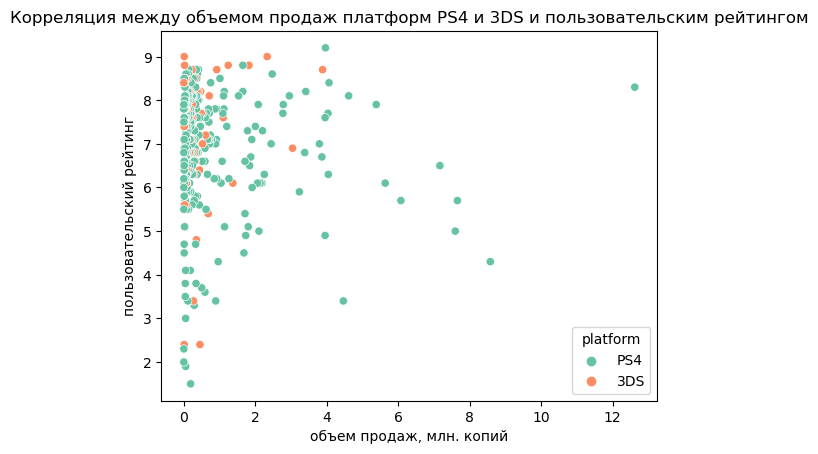

In [71]:
ps4_and_3ds = data_new.query('platform in ["PS4", "3DS"]')

sns.scatterplot(data=ps4_and_3ds, x='total_sales', y='user_score', hue='platform', palette='Set2')
plt.title('Корреляция между объемом продаж платформ PS4 и 3DS и пользовательским рейтингом')
plt.xlabel('объем продаж, млн. копий')
plt.ylabel('пользовательский рейтинг')
plt.show();

In [72]:
ps4_and_3ds['total_sales'].corr(ps4_and_3ds['user_score'])

-0.023412235686031804

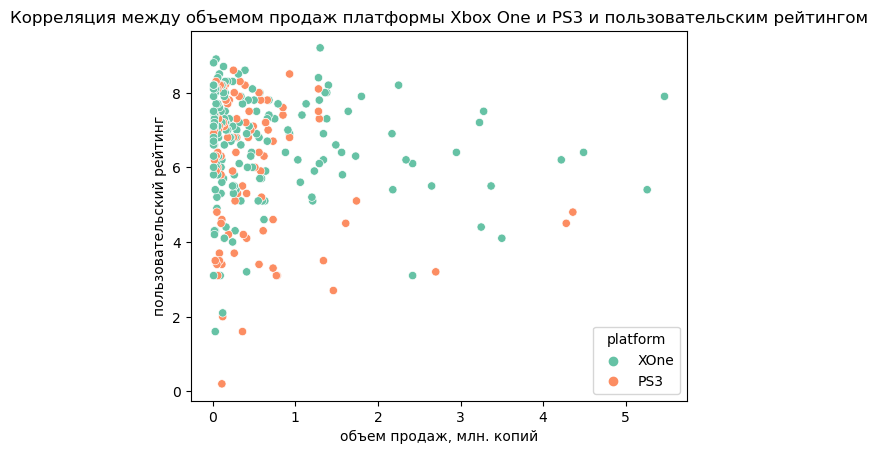

In [73]:
xone_and_ps3 = data_new.query('platform in ["XOne", "PS3"]')
                              
sns.scatterplot(data=xone_and_ps3, x='total_sales', y='user_score', hue='platform', palette='Set2')
plt.title('Корреляция между объемом продаж платформы Xbox One и PS3 и пользовательским рейтингом')
plt.xlabel('объем продаж, млн. копий')
plt.ylabel('пользовательский рейтинг')
plt.show();

In [74]:
xone_and_ps3['total_sales'].corr(xone_and_ps3['user_score'])

-0.07848864930440327

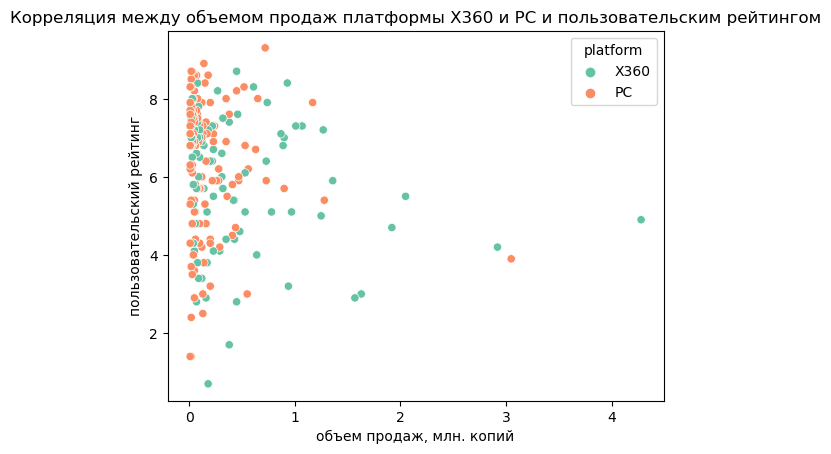

In [75]:
x360_and_pc = data_new.query('platform in ["X360", "PC"]')

sns.scatterplot(data=x360_and_pc, x='total_sales', y='user_score', hue='platform', palette='Set2')
plt.title('Корреляция между объемом продаж платформы X360 и PC и пользовательским рейтингом')
plt.xlabel('объем продаж, млн. копий')
plt.ylabel('пользовательский рейтинг')
plt.show();


In [76]:
x360_and_pc['total_sales'].corr(x360_and_pc['user_score'])

-0.14030255967356844

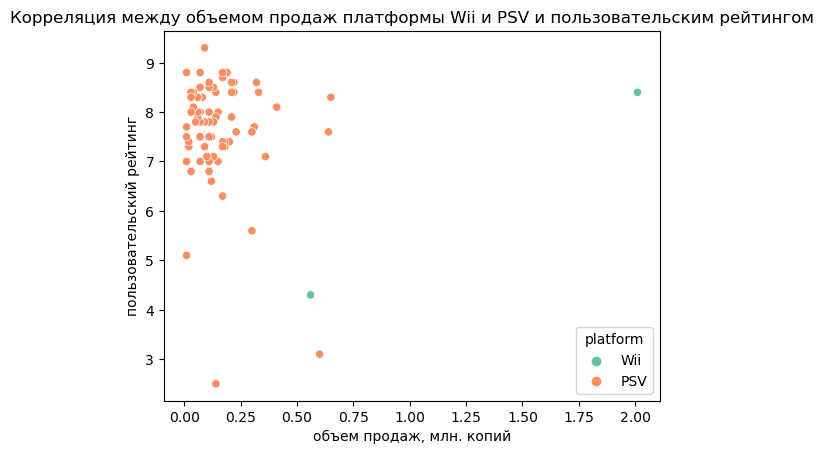

In [77]:
wii_psv = data_new.query('platform in ["Wii", "PSV"]')

sns.scatterplot(data=wii_psv, x='total_sales', y='user_score', hue='platform', palette='Set2')
plt.title('Корреляция между объемом продаж платформы Wii и PSV и пользовательским рейтингом')
plt.xlabel('объем продаж, млн. копий')
plt.ylabel('пользовательский рейтинг')
plt.show();

In [78]:
wii_psv['total_sales'].corr(wii_psv['user_score'])

-0.07843857293614459

# Изучение распределения жанров игр

**Самые высокие продажи в актуальный период были у игр со следующими жанрами: экшн, шутер, ролевая игра(RPG), а также спорт. На гистограмме видно, что "другие" занимают 5 место по объему продаж: поскольку неизвестно, какие именно жанры данная категория в себя включает. В связи с этим несмотря на более низкиие продажи будет также считать прибыльным жанром платформер.**

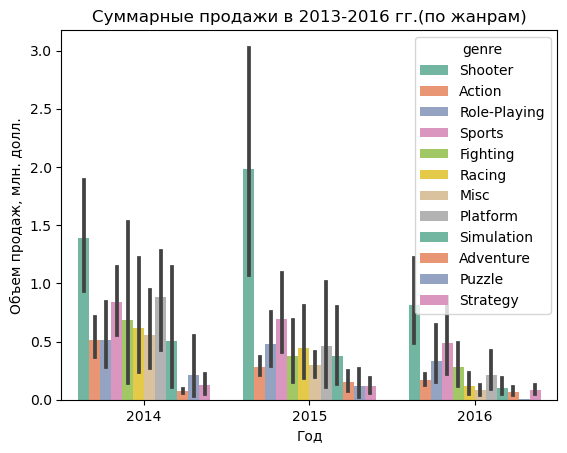

In [79]:

sns.barplot(data=data_new, x='year_of_release', y='total_sales', hue='genre', palette= 'Set2')
plt.xlabel('Год')
plt.ylabel('Объем продаж, млн. долл.')
plt.title('Суммарные продажи в 2013-2016 гг.(по жанрам)')
plt.show();

**На графике видно, что общие продажи всех жанров за исключением экшена, шутера, ролевых (RPG)  и спортивных игр  были стабильными на протяжении всего актуального периода. В 2014-2015 гг. игры жанра экшн лидировали по продажам, но к 2016 г. уступили первое место шутерам. В 2015 г. спортивные игры обогнали RPG по объему продаж и, таким образом, вырвались в топ-3. У игр с наименьшим объемом продаж почти одинаковые  значения: у приключенческих игр и симуляторов он находился на уровне 3-4 млн. копий, в то время как у головоломок и стратегических игр - менее 1 млн. копий.**


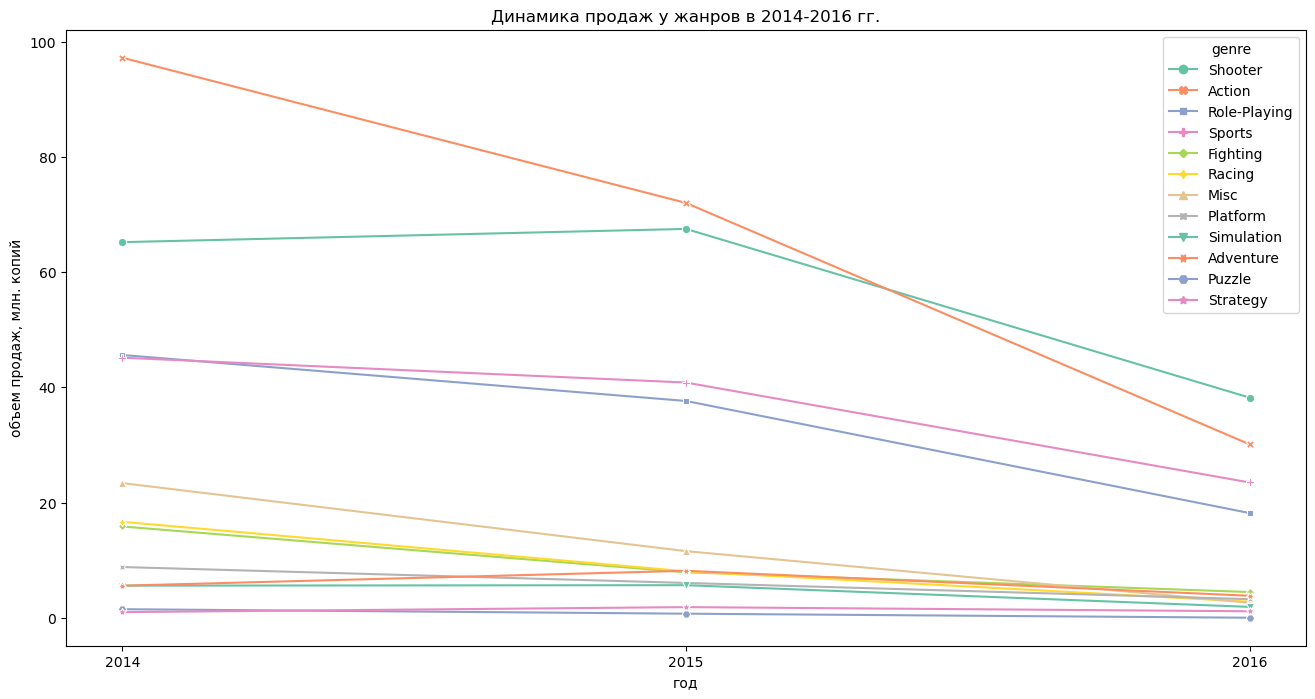

In [80]:
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data=data_new, x='year_of_release', y='total_sales', hue='genre', \
            style='genre',estimator='sum', ci=None, markers=True,dashes=False, palette='Set2')
ax.set_xticks(range(2014,2017)),
plt.xlabel('год')
plt.ylabel('объем продаж, млн. копий')
plt.title('Динамика продаж у жанров в 2014-2016 гг.')
plt.show();

**Обратимся к диаграмме размаха, чтобы изучить, у каких жанров наибольшее количество выбросов. Как видно ниже, экшн-игры лидируют по количеству аномальных значений: именно по этой причине они занимают первое место по суммарным продажам, несмотря на то, что их медиана меньше, чем у шутеров, платформеров, а также спортивных и файтинг-игр. У шутеров выбросы есть, но их значительно меньше: это подтверждает, что продажи у данного жанра более стабильные.**

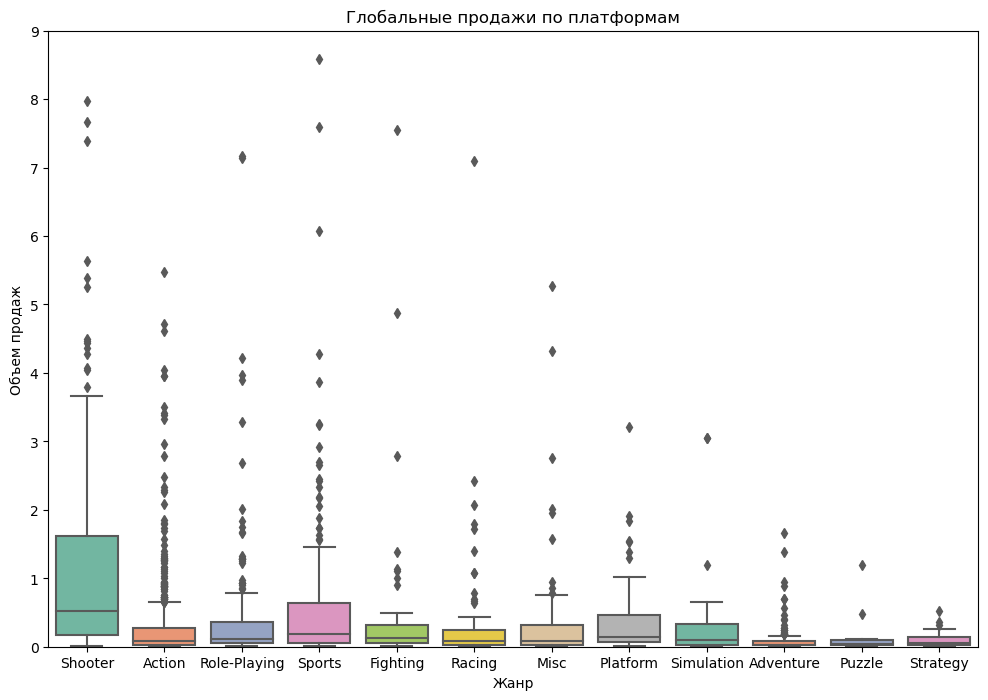

In [81]:
palette = sns.color_palette('Set2')

fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x='genre', y='total_sales', data=data_new, palette=palette)

plt.title('Глобальные продажи по платформам')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж')
plt.ylim(0,9)
plt.show();

**У шутеров третий квантиль расположен выше остальных - на уровне 1.6 млн. копий. У игр в жанре экшн, которые занимают первое место по объему продаж, он расположен на уровне 0.25 млн: это доказывает, что высокий показатель продаж не имеет ничего общего с успехом этого жанра на рынке.  
Опираясь на это, можно сделать вывод о том, что в жанре экшн присутствует много непопулярных игр с низкими объёмами продаж, в результате чего общий объём продаж жанра "раздут" и берётся количеством, а не качеством. Если обратить внимание на третие квантили и максимальные значения других жанр, то станет очевидно, что на самом деле экшен-игры менне популярны среди пользователей, чем спортивные, платформера и ролевые (RPG) игры.**
    
    
    
    
    
    

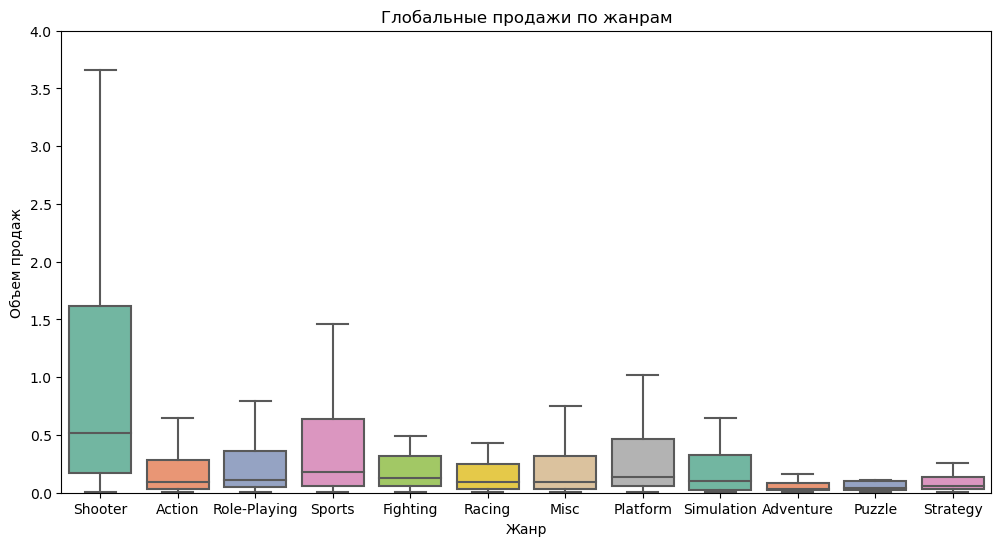

In [82]:
palette = sns.color_palette('Set2')

fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x='genre', y='total_sales', data=data_new, palette=palette, showfliers=False)

plt.title('Глобальные продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж')
plt.ylim(0,4)
plt.show();

**Теперь изучим динамику средних продаж. На протяжении всего актуального периода шутеры лидировали по средним продажам, но столкнулись с самым резким снижением продаж в 2016г: оно составило более 50%. В целом, почти у всех игр средние продажи были стабильными в 2013-2016 гг. Помимо шутеров исключением также являются игры в жанре экшен, платформеры и игры-файтинги. В 2014 г. платформеры занимали второе место по средним продажам, но в 2016 г. уступили файтингам, а также спортивным и приключенческим играм.**

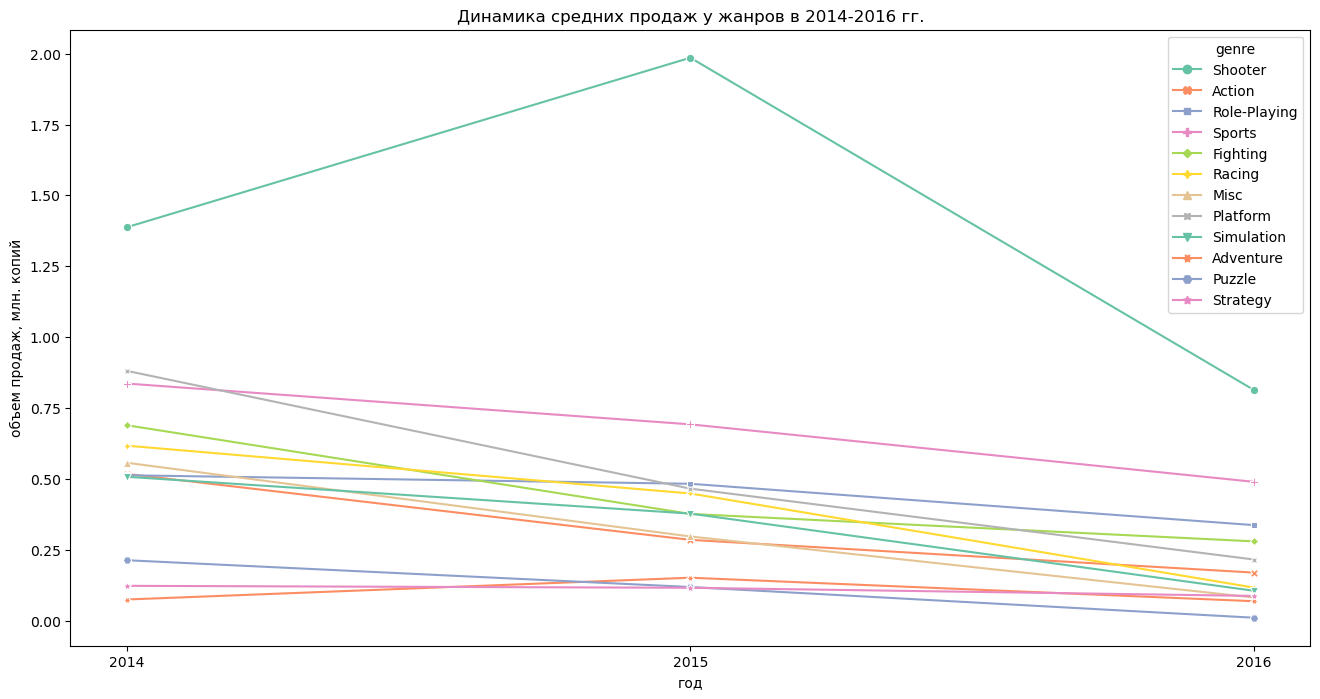

In [83]:
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data=data_new, x='year_of_release', y='total_sales', hue='genre', \
            style='genre',estimator='mean', ci=None, markers=True,dashes=False, palette='Set2')
ax.set_xticks(range(2014,2017)),
plt.xlabel('год')
plt.ylabel('объем продаж, млн. копий')
plt.title('Динамика средних продаж у жанров в 2014-2016 гг.')
plt.show();

# Шаг 4. Составление портрета пользователя каждого региона

## Северная Америка

**В Северной Америке самые высокие продажи были у PS4, Xbox One, WiiU, WiiU и X360.**

**Построим диаграммы размаха, чтобы убедится в своем выборе. Как видно ниже, на самом высоком уровне третие квантили расположены у платформ Xbox One, X360,Wii, и PS4. У этих платформ также самые высокие медианы и максимальные значения.**

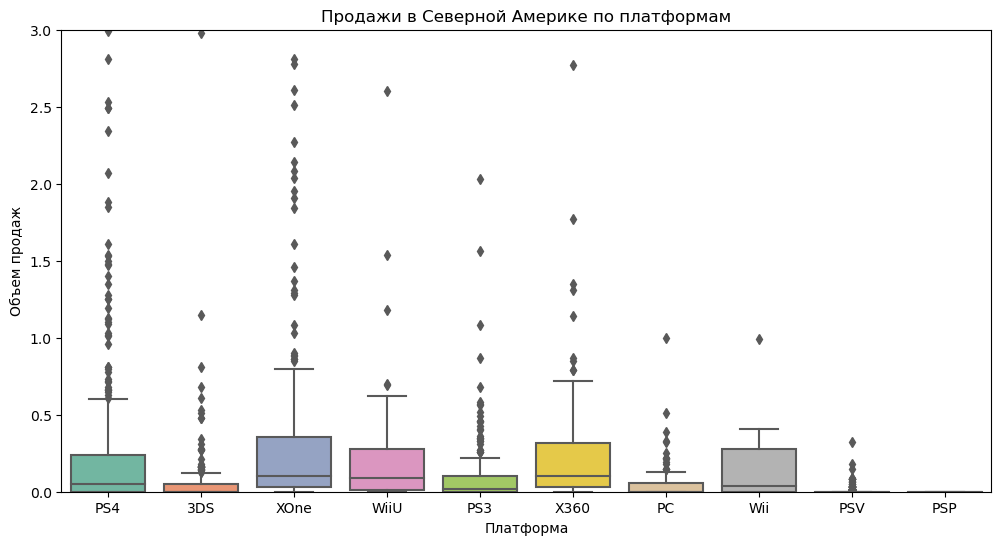

In [84]:
palette = sns.color_palette('Set2')

fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x='platform', y='na_sales', data=data_new, palette=palette)


plt.title('Продажи в Северной Америке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Объем продаж')
plt.ylim(0,3)
plt.show()

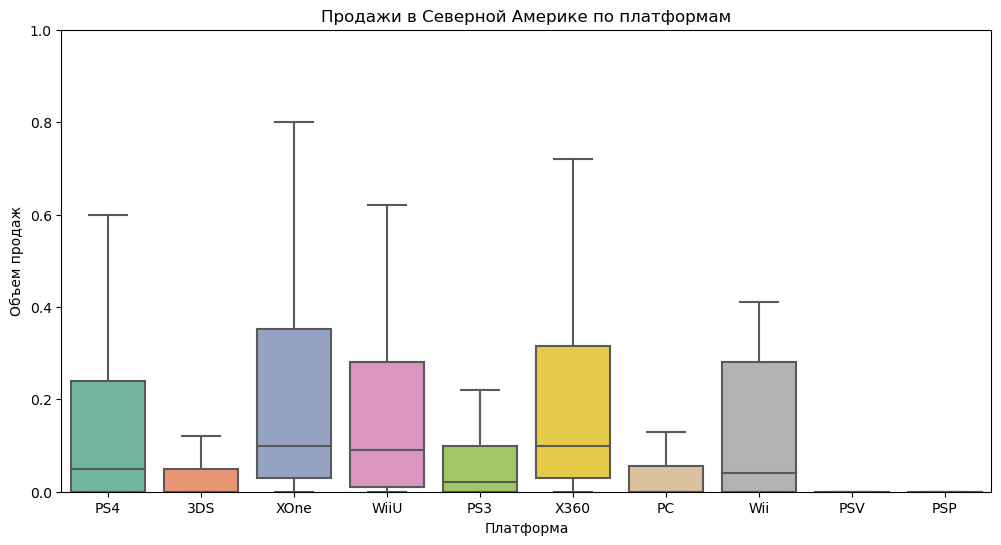

In [85]:
palette = sns.color_palette('Set2')

fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x='platform', y='na_sales', data=data_new, palette=palette, showfliers=False)



plt.title('Продажи в Северной Америке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Объем продаж')
plt.ylim(0,1)
plt.show()

**На протяжении всего актуального периода лидером средних продаж в Северной Америке была платформа Xbox One. Платформа PS4 уверенно занимала второе место, однако в тевение 2015 г. ее обогнала WiiU. У X360 средние продажи в 2015 г. снизились, в то время как у 3DS они наоборот выросли.**

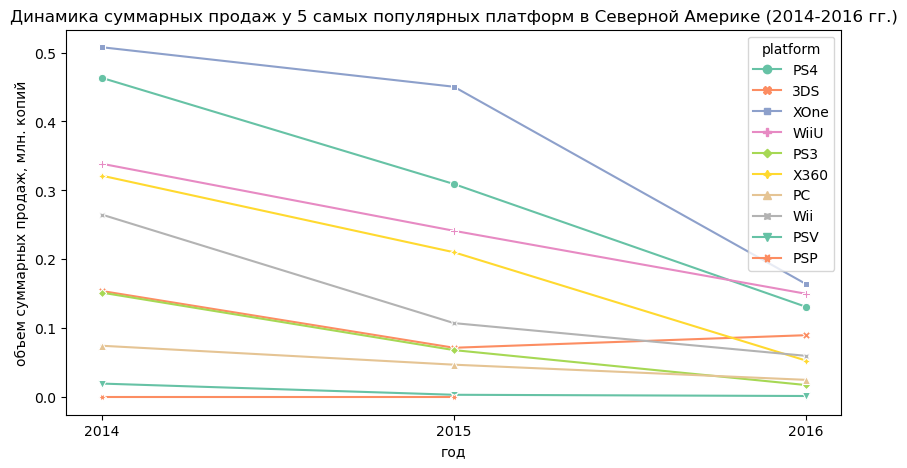

In [86]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=data_new, x='year_of_release', y='na_sales', hue='platform',estimator='mean', \
            style='platform', ci=None, markers=True,dashes=False, palette='Set2')
ax.set_xticks(range(2014,2017)),
plt.xlabel('год')
plt.ylabel('объем суммарных продаж, млн. копий')
plt.title('Динамика суммарных продаж у 5 самых популярных платформ в Северной Америке (2014-2016 гг.)')
plt.show();

**В начале актуального периода лидером по суммарным продажам в Севернной Америке была PS4; ее отрыв от Xbox One составлял около 4 млн. копий. У обеих платформ в течение 2014 г. выросли продажи, в то время как у остальных платформ, наоборот, происходило снижение. Однако уже в 2015 г. обе платформы столкнулись с резким падением продаж. WiiU,PS3 и X360 также столкнулись со сниженим продаж, но оно было не таким резким.**


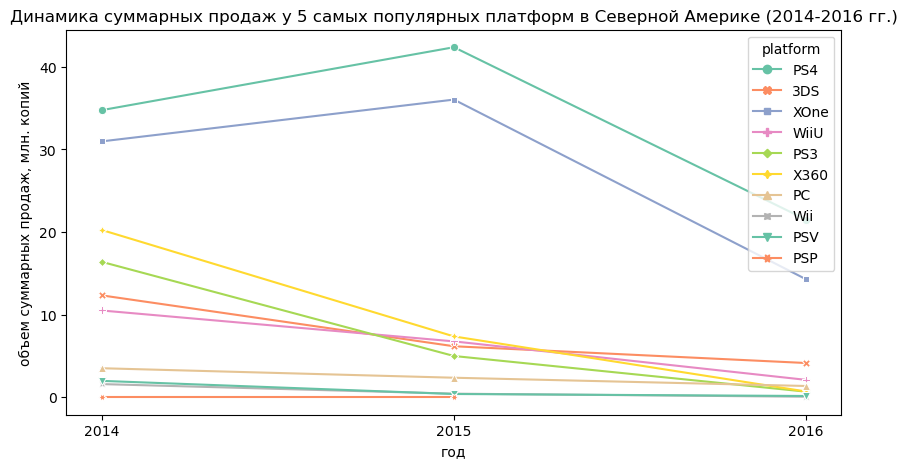

In [87]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=data_new, x='year_of_release', y='na_sales', hue='platform',estimator='sum', \
            style='platform', ci=None, markers=True,dashes=False, palette='Set2')
ax.set_xticks(range(2014,2017)),
plt.xlabel('год')
plt.ylabel('объем суммарных продаж, млн. копий')
plt.title('Динамика суммарных продаж у 5 самых популярных платформ в Северной Америке (2014-2016 гг.)')
plt.show();

**Построим диаграммы размаха для того, чтобы определить, какие жанры были самыми популярными в Северной Америке.**

**Большое количество выбросов обнаружено у экшен- и ролевых игр.**

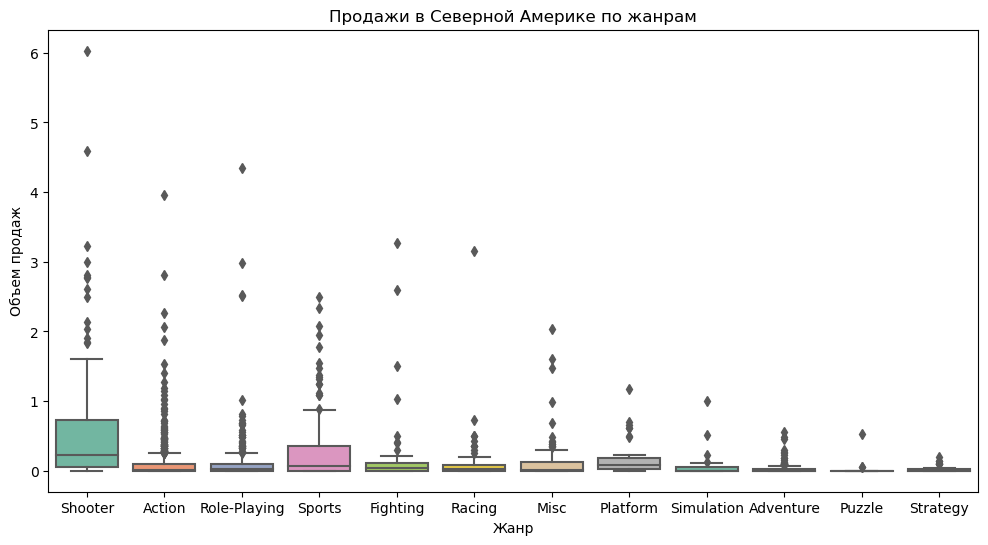

In [88]:
palette = sns.color_palette('Set2')

fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x='genre', y='na_sales', data=data_new, palette=palette)



plt.title('Продажи в Северной Америке по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж') 
plt.show()

**Посмотрим на график без аномальных значений. Третьи квантили  на самом высоком уровне расположены у таких жанров как шутеры, спортивные игры, платформеры,экшены и ролевые игры. Они и являются самыми популярными в регионе.** 

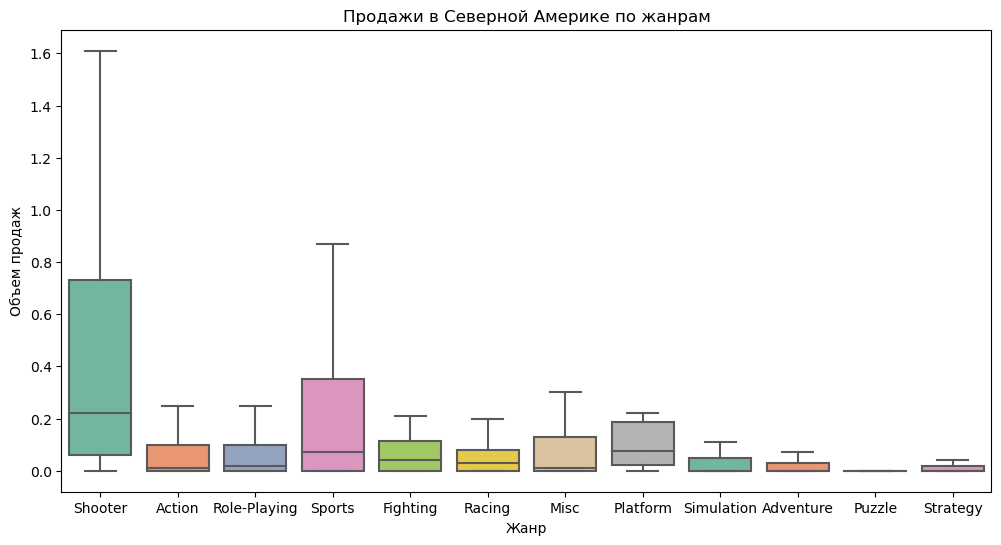

In [89]:
palette = sns.color_palette('Set2')

fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x='genre', y='na_sales', data=data_new, palette=palette, showfliers=False)



plt.title('Продажи в Северной Америке по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж')
plt.show()

**Посмотрим на динамику средних продаж жанров в Северной Америке. На протяжении всего актуального периода лидером были шутеры; у них существенный отрыв от остальных жанров. На втором месте по популярности игры в жанре экшен. Файтинг-игры и платформеры шли в бок-о-бок во время всего рассматриваемого периода. За 2014 г. у ролевых игр (RPG) выросли средние продажи, в связи с чем они позде смогли догнать файтинги и даже обогнать платформеры.**

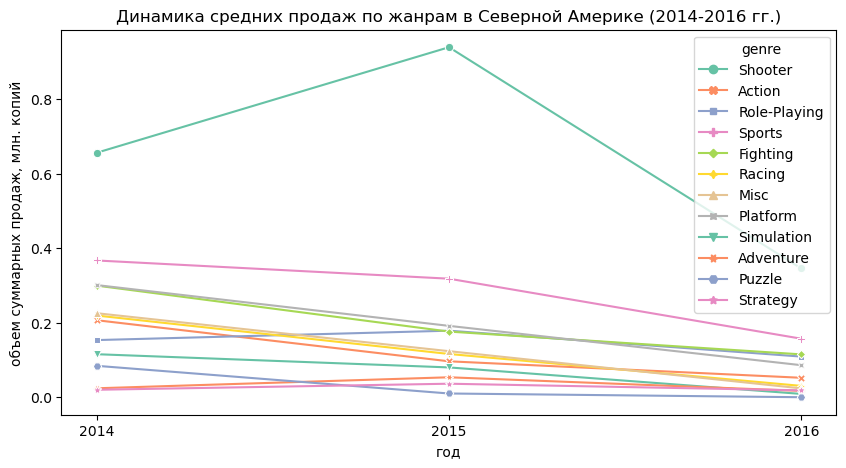

In [90]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=data_new, x='year_of_release', y='na_sales', hue='genre',estimator='mean', \
            style='genre', ci=None, markers=True,dashes=False, palette='Set2')
ax.set_xticks(range(2014,2017)),
plt.xlabel('год')
plt.ylabel('объем суммарных продаж, млн. копий')
plt.title('Динамика средних продаж по жанрам в Северной Америке (2014-2016 гг.)')
plt.show();

**По суммарным продажам также лидируют экшен-игры, шутеры, спортивные игры, ролевые игры (RPG) и платформеры.Как было подчеркнуто выше,высокие показатели суммарных продаж у экшена и ролевых игр связаны с выбросами, т.е.аномальными значениями.**

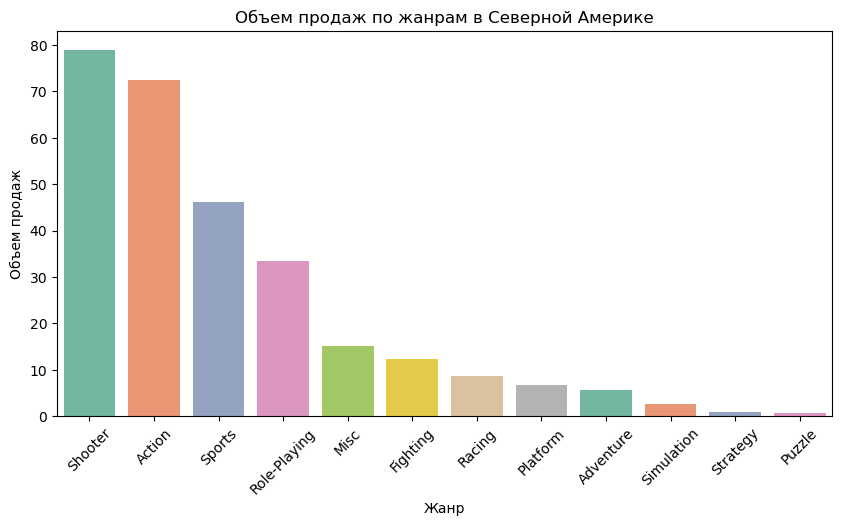

In [95]:
fig, ax = plt.subplots(figsize=(10,5))

na_sales_per_genre = data_new.pivot_table(index='genre',
                                          values='na_sales',
                                          aggfunc = 'sum').sort_values(by='na_sales',ascending=False).reset_index()
sns.barplot(data=na_sales_per_genre, x='genre',y='na_sales', palette='Set2')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж')
plt.title('Объем продаж по жанрам в Северной Америке')
plt.xticks(rotation=45)
plt.show();

**Посмотрим, существует ли корреляция между объемом продаж в Северной Америке и рейтингом ESRB.**

In [96]:
data_new.rating.value_counts()

T       271
M       265
E       219
E10+    185
Name: rating, dtype: int64

In [97]:
data_new['rating']=data_new['rating'].fillna('absent')#заменим пропуски в столбце с рейтингом
len(data_new[data_new['rating'].isna()])

0

In [98]:
data_new.rating.value_counts()

absent    749
T         271
M         265
E         219
E10+      185
Name: rating, dtype: int64

**В Северной Америке влияние рейтинга оказывает ограниченное влияние на продажи. С одной стороны, объем продаж у игр с рейтингом М (для людей старше 17 лет) в 2 раза выше, чем у игр с другим рейтингом: единственные игры, число проданных копий которых составляет более 5 млн, это те, у которых рейтинг M. C другой стороны, игры, у которых не указан рейтинг, занимают второе место по объему продаж.**  

In [99]:
data_new.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False)

,na_sales
rating,
M,96.42
absent,64.72
E,50.74
T,38.95
E10+,33.23


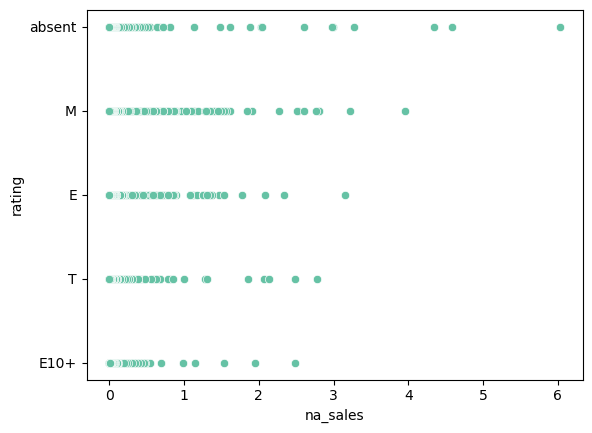

In [100]:
sns.scatterplot(data=data_new, x='na_sales', y='rating',color='#66c2a5');

**Таким образом, в Северной Америке наиболее популярными платформами в актуальный период были Xbox One,X360, Wii, WiiU и PS4.: на них пришлось более 80 % всех продаж. Пользователи в данном регионе  в большей степени отдавали предпочтение таким жанрам как шутеры,спортивные игры, платформеры, экшен и  ролевые игры (RPG). Также было выявлено, что рейтинг оказывает  влияние на объем продаж, однако оно ограничено в силу того, что игры без рейтинга являются второй группой по объему продаж.**

## Европа

**На протяжении актуального периода в Европе самые высокие продажи были у PS4, Xbox One, Wii, WiiU, а также X360.**

**Диаграмма размаха подкрепляет вывод выше. У Wii третий квантиль расположен на уровне 0.45 млн., в то время как у PS4 - около 0.29 млн., и есть много выбросов. У XOne и WiiU  третьи квантили расположены на одном уровне,максимальные значения также почти совпадают. У X360 и PC медианы почти совпадают, но у первой платформы третий квантиль выше и меньше выбросов: этим было мотивирано решение включить X360 в региональное топ-5.**

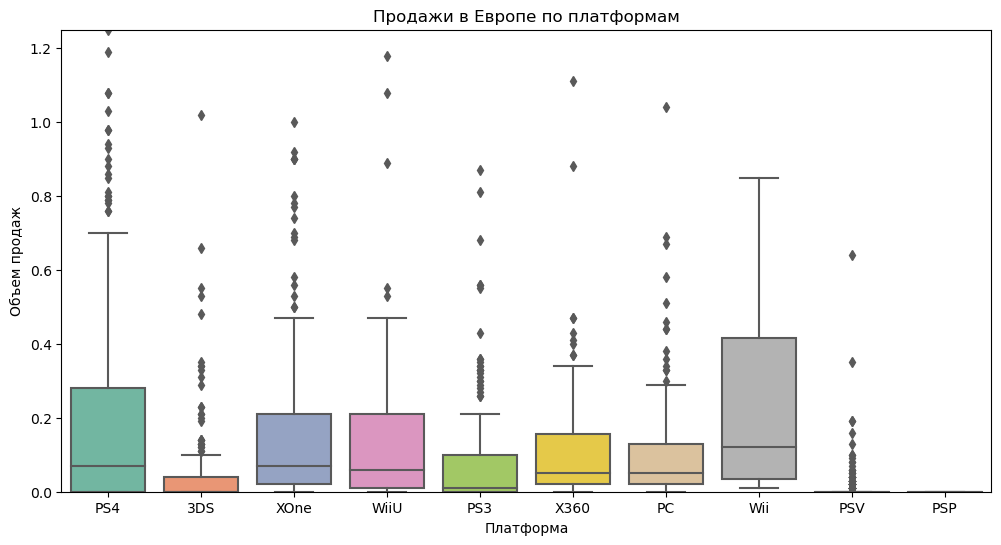

In [101]:
palette = sns.color_palette('Set2')

fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x='platform', y='eu_sales', data=data_new, palette=palette)


plt.title('Продажи в Европе по платформам')
plt.xlabel('Платформа')
plt.ylabel('Объем продаж')
plt.ylim(0,1.25)
plt.show()

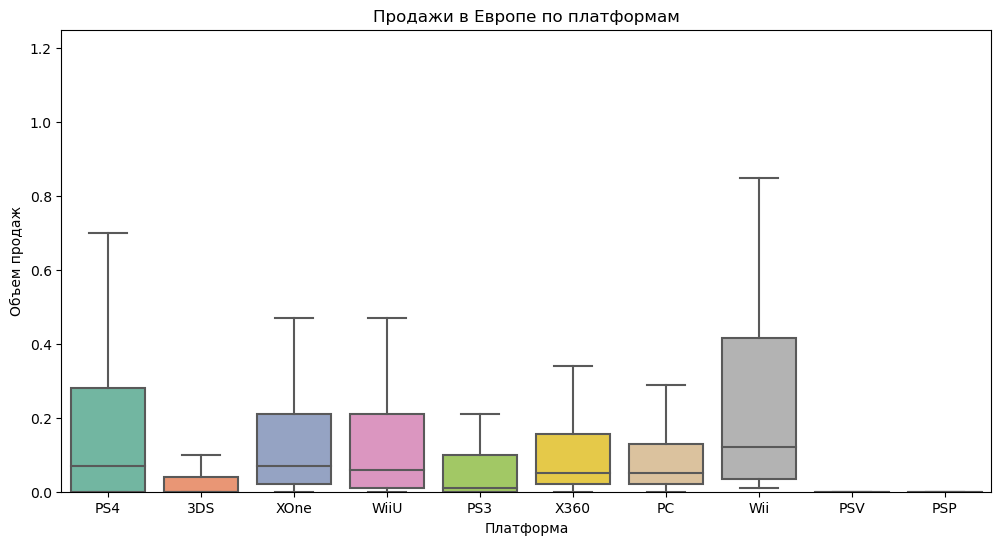

In [102]:
palette = sns.color_palette('Set2')

fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x='platform', y='eu_sales', data=data_new, palette=palette, showfliers=False)


plt.title('Продажи в Европе по платформам')
plt.xlabel('Платформа')
plt.ylabel('Объем продаж')
plt.ylim(0,1.25)
plt.show()

**Изучим динамику изменения средних продаж у 5 самых популярных платформ в Европе. На протяжении всего актуального периода PS4 уверенно лидировала ппо средним продажам. Сначала Wii c незначительным отрывом от Xbox One занимала второе место, однако уже в 2015 г. из-за резкого сокращения объема продаж опустилась на четвертое место, уступив Xbox One и WiiU. В весь рассматриваемый период на пятом месте по средним продажам была PC.**


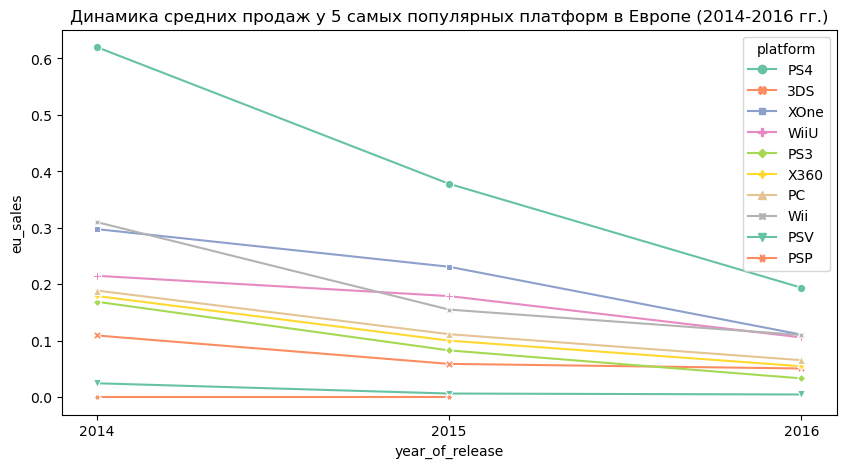

In [103]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=data_new, x='year_of_release', y='eu_sales', hue='platform', \
            estimator='mean',style='platform', ci=None, markers=True,dashes=False, palette='Set2')
ax.set_xticks(range(2014,2017)),
plt.title('Динамика средних продаж у 5 самых популярных платформ в Европе (2014-2016 гг.)')
plt.show();

**С большим отрывом на протяжении всего периода PS4 лидировала по суммарным продажам: отрыв составлял более 20 мн. копий. В начале рассматриваемого периода у Xbox One и PS3 продажи были на одном уровне, но уже в следующем году PS3 столкнулась с резким падением продаж. У Xbox One cущественный отрыв от остальных платформ. У X360, PC, WiiU в 2015 г. продажи практически были на одном уровне.** 


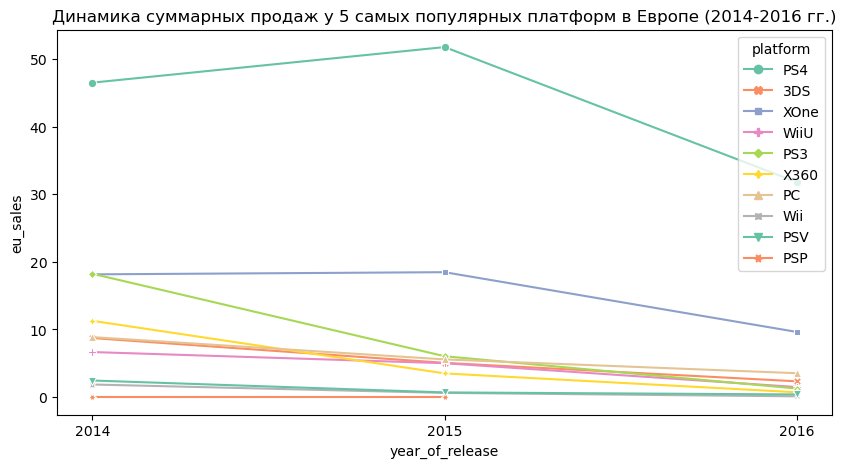

In [104]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=data_new, x='year_of_release', y='eu_sales', hue='platform', \
            estimator='sum',style='platform', ci=None, markers=True,dashes=False, palette='Set2')
ax.set_xticks(range(2014,2017)),
plt.title('Динамика суммарных продаж у 5 самых популярных платформ в Европе (2014-2016 гг.)')
plt.show();

**Cамыми популярными жанрами в Европе были: шутеры, cпортивные игры, платформеры, симуляционные игры, а также гонки.**

**На диаграмме размаха видно, что у шутеров третий квантиль расположен на самом высоком уровне:около 0.6 млн. Затем следуют спортивные игры (0.15 млн.), платформеры (около 0.14 млн.), игры-симуляции и гонки (около 0.1 млн.).Обращает на себя внимание большое количество выбросов у таких жанров как экшен, ролевые  и приключенческие игры. Можно сделать вывод о том, что на самом деле эти жанры не пользуются популярностью у европейских пользователей; продажи завышены из-за большого количества непопулярных игр.**

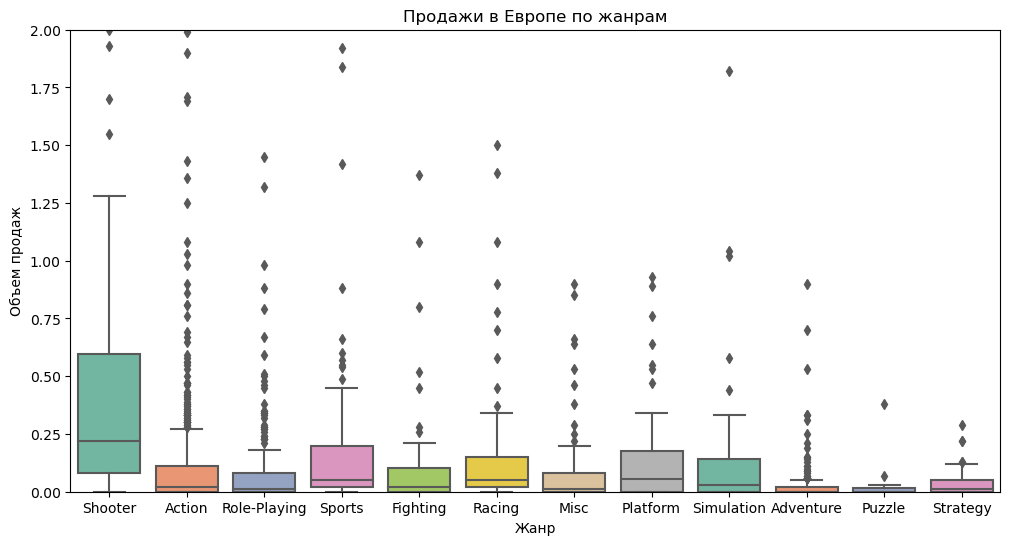

In [105]:
palette = sns.color_palette('Set2')

fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x='genre', y='eu_sales', data=data_new, palette=palette)


plt.title('Продажи в Европе по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж')
plt.ylim(0,2)
plt.show()

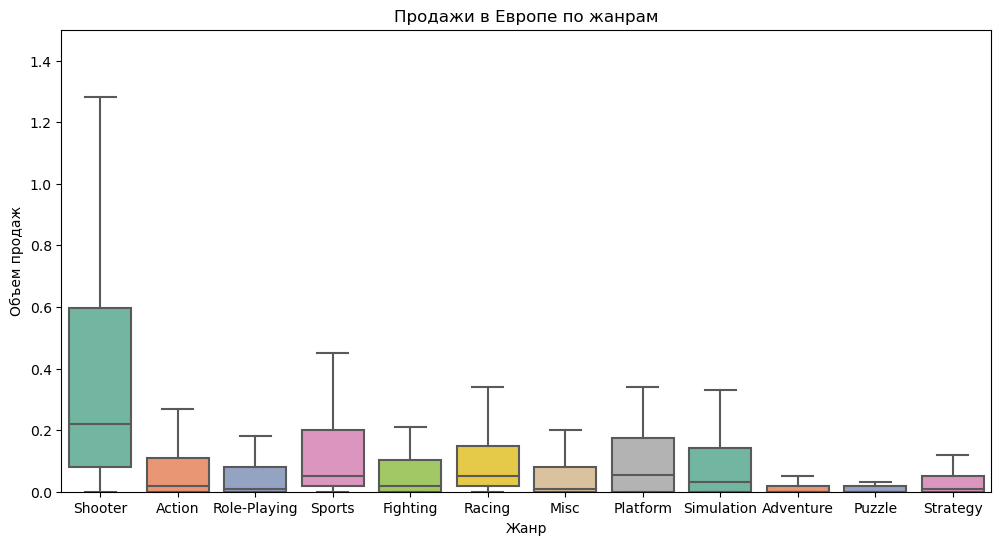

In [106]:
palette = sns.color_palette('Set2')

fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x='genre', y='eu_sales', data=data_new, palette=palette, showfliers=False)


plt.title('Продажи в Европе по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж')
plt.ylim(0,1.5)
plt.show()

**Визуализируем динамику средних продаж жанров. С большим отрывом лидировали игры-шутеры. Спортивные игры в начале занимали третье место, но уже в 2015 году обогнали платформеры; фактическ в 2015 г. спортивные игры делили второе место с гонками; последние столкнулись с резким сокращением продаж, однако.** 

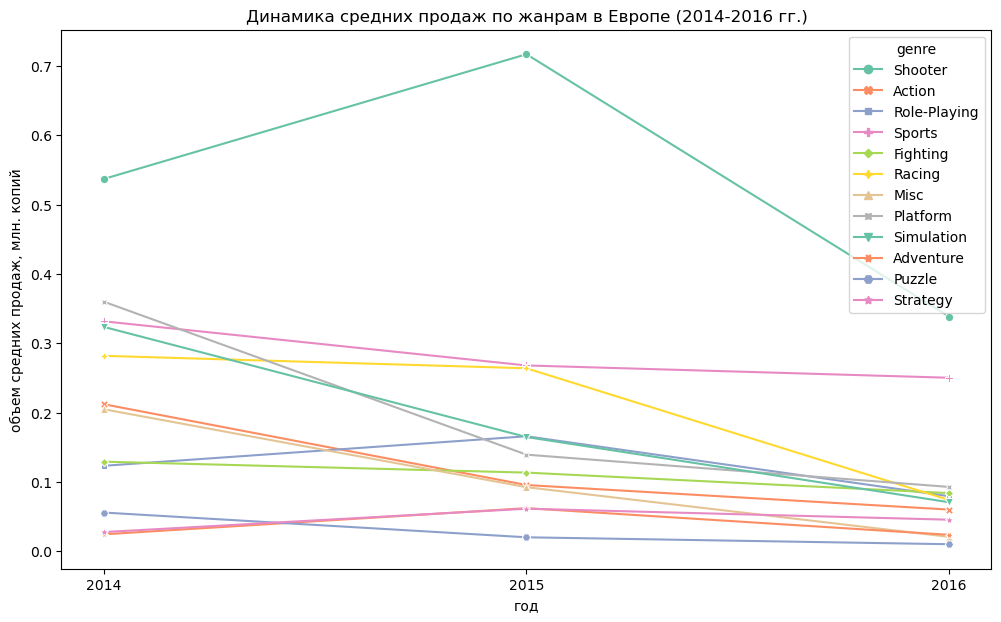

In [107]:
fig, ax = plt.subplots(figsize=(12,7))
sns.lineplot(data=data_new, x='year_of_release', y='eu_sales', hue='genre',estimator='mean', \
            style='genre', ci=None, markers=True,dashes=False, palette='Set2')
ax.set_xticks(range(2014,2017)),
plt.xlabel('год')
plt.ylabel('объем средних продаж, млн. копий')
plt.title('Динамика средних продаж по жанрам в Европе (2014-2016 гг.)')
plt.show();

**Игры в жанре экшен занимают первое место по суммарным продажам, хотя значительно уступают другим жанрам по показателю средних продаж. Дело в том, что показатель игр в этом жанре завышен. В силу большого количества выбросов в этом жанре выпускалось много непопулярных игр с низкими продажами. Аналогичная ситуация и с ролевыми играми.**  

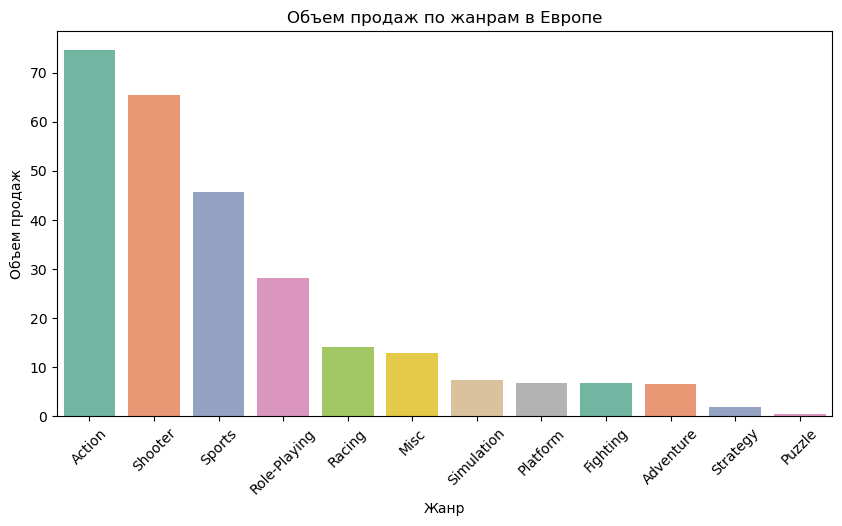

In [108]:
fig, ax = plt.subplots(figsize=(10,5))

na_sales_per_genre = data_new.pivot_table(index='genre',
                                          values='eu_sales',
                                          aggfunc = 'sum').sort_values(by='eu_sales',ascending=False).reset_index()
sns.barplot(data=na_sales_per_genre, x='genre',y='eu_sales', palette='Set2')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж')
plt.title('Объем продаж по жанрам в Европе')
plt.xticks(rotation=45)
plt.show();

**Посмотрим на доли продаж платформ в 2016 г. На PS4 пришлось 62% продаж; это почти четырехкратный отрыв от Xbox One, у которой доля продаж составляет 18.8 %. На PC приходится 6.89 % продаж, в то время как на 3DS и WiiU - 4.55% и 2.89% соответственно.** 

**В Европе рейтинг ESRB влияет на продажи, однако довольно ограничено. Больше всего было продано игр с рейтингом M (для лиц старше 17 лет),однако при этом игры без рейтинга занимают второе место. В этом можно найти сходство североамериканского и европейского рынков.**

In [109]:
data_new.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False)

,eu_sales
rating,
M,93.44
absent,58.95
E,58.06
T,34.07
E10+,26.16


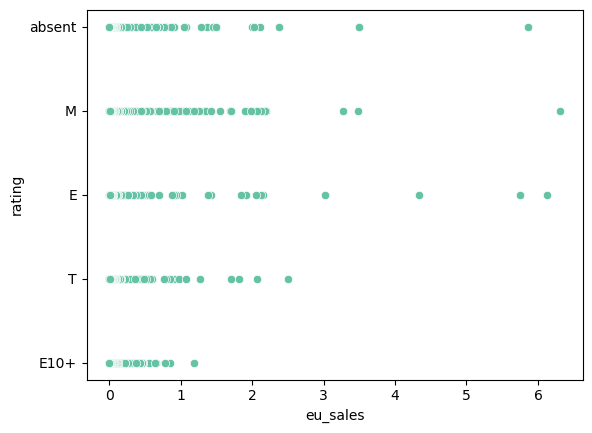

In [110]:
sns.scatterplot(data=data_new, x='eu_sales', y='rating',color='#66c2a5');

**Таким образом, в Европе наиболее популярными платформами в актуальный период являются Wii, PS, Xbox One, а также WiiU и X360.  При выборе жанра европейские пользователи отдают предпочтение шутерам, спортивным играм,платформерам, а также симуляционным и гонкам. Так же как и в Северной Америке в Европе влияние рейтинга на продажи довольно ограничено.** 

## Япония

**В актуальный период самые высокие продажи были у таких платформ как 3DS, WiiU, PS3, PSV и PS4.**

**На диаграмме размаха видно, что третий квантиль расположен выше всего у платформы 3DS (0.13 млн.); у нее также мало выбросов, что указывает на то, что продажи носили стабильный характер. Платформа брала качеством продаж, а не их количеством. У платформы Wii медиана меньше, чем у PS4, PS3 и PSV,однако, ее третий кваниль расположен выше, чем у них. У данной платформы также мало аномальных значений: это важный признак того, что платформа в действительности пользуется популярностью.** 

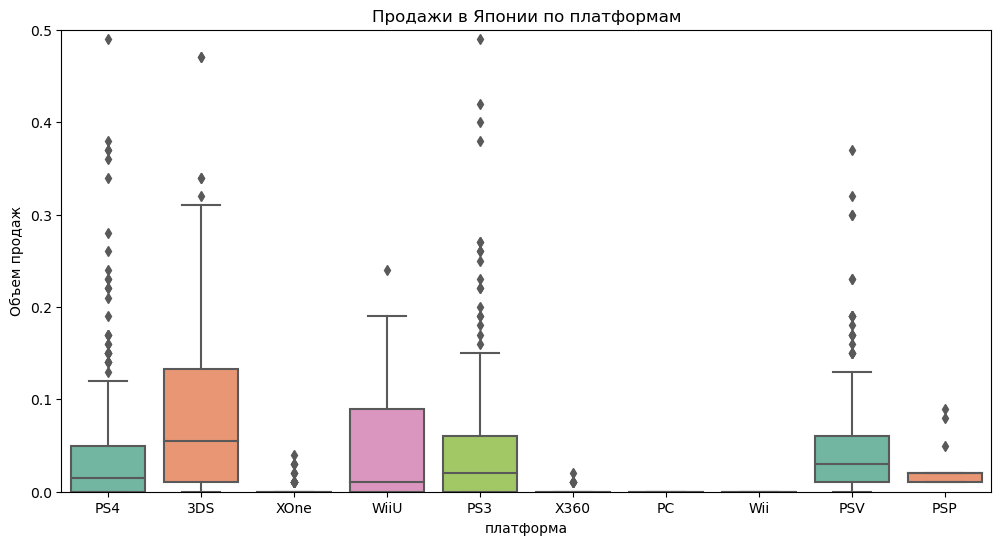

In [111]:
palette = sns.color_palette('Set2')

fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x='platform', y='jp_sales', data=data_new, palette=palette)


plt.title('Продажи в Японии по платформам')
plt.xlabel('платформа')
plt.ylabel('Объем продаж')
plt.ylim(0,0.5)
plt.show()

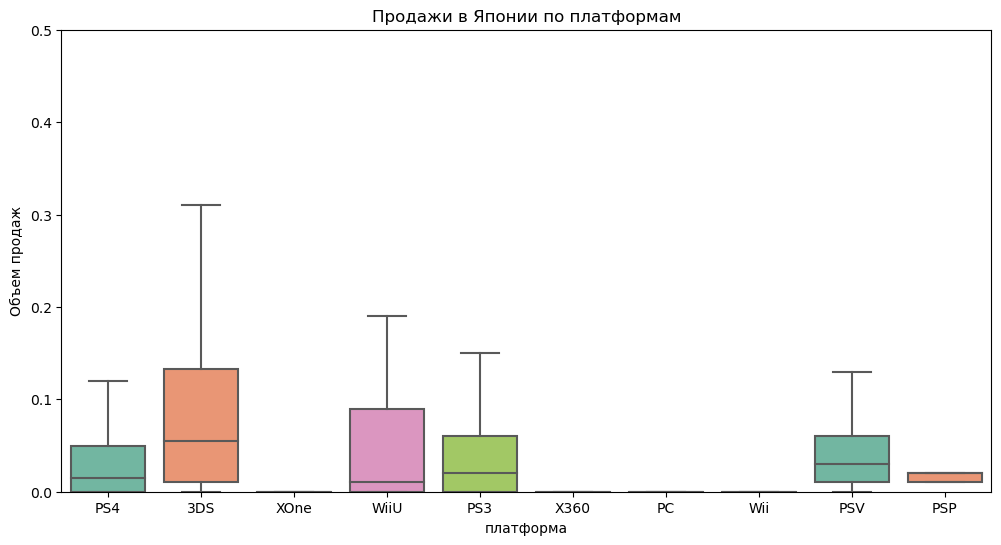

In [112]:
palette = sns.color_palette('Set2')

fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x='platform', y='jp_sales', data=data_new, palette=palette, showfliers=False)


plt.title('Продажи в Японии по платформам')
plt.xlabel('платформа')
plt.ylabel('Объем продаж')
plt.ylim(0,0.5)
plt.show()

**На протяжении актуального периода в Японии по средним продаж лидировала платформа 3DS несмотря на то, что c каждым последующим годом происходило снижение. У WiiU, наоборот, в 2014 г. был рост средних продаж, однако уже в следующий год платформа столкнулась со снижением. У треих остальных платформ из регионального топ-5 (PS3, PS4, PSV) не было резких изменений в объеме средних продаж: их показатели очень похожи.**

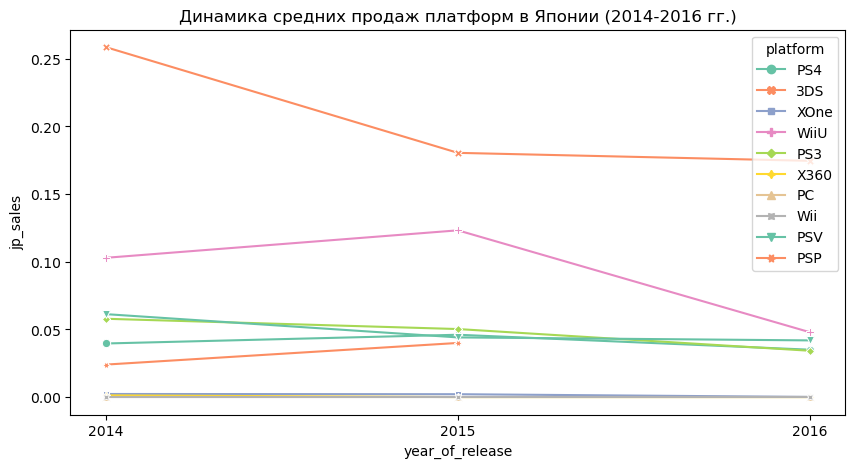

In [113]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=data_new, x='year_of_release', y='jp_sales', hue='platform',\
             estimator='mean', style='platform', ci=None, markers=True,dashes=False, palette='Set2')
ax.set_xticks(range(2014,2017)),
plt.title('Динамика средних продаж платформ в Японии (2014-2016 гг.)')
plt.show();

**Выявим топ-5 жанров в Японии. Ими являются ролевые игры (RPG), головоломки, файтинг-игры, экшен и платформеры.**

**На диаграмме размаха вижно, что третий квантиль выше всего расположен у головолок и ролевых игр. Затем следуют файтинг-игры, экшен и платформеры.**

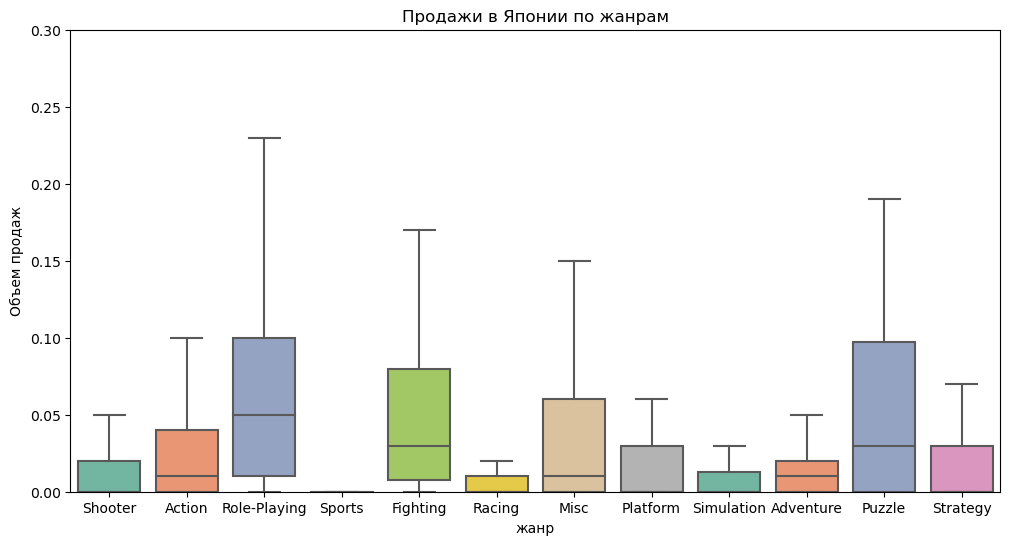

In [114]:
palette = sns.color_palette('Set2')

fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x='genre', y='jp_sales', data=data_new, palette=palette,showfliers=False)


plt.title('Продажи в Японии по жанрам')
plt.xlabel('жанр')
plt.ylabel('Объем продаж')
plt.ylim(0,0.3)
plt.show()

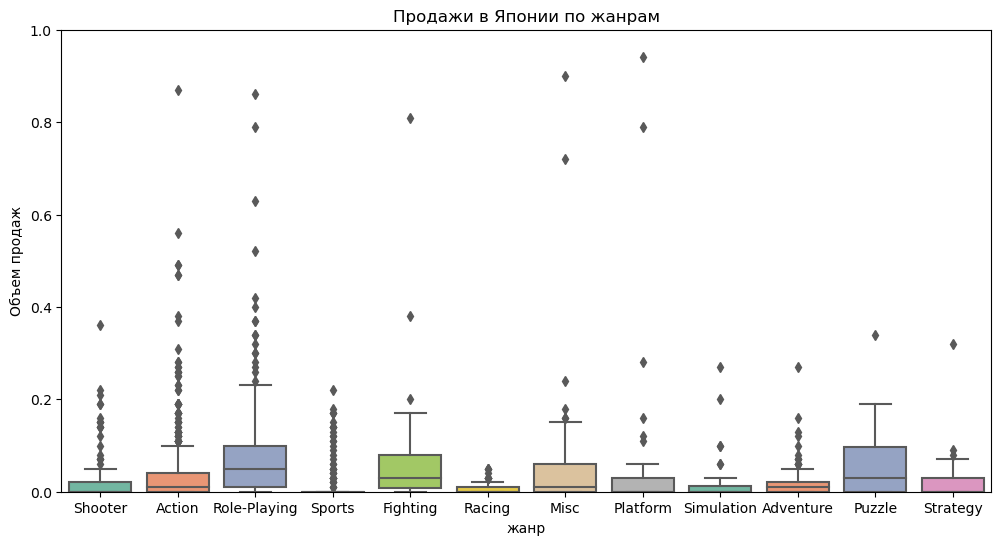

In [115]:
palette = sns.color_palette('Set2')

fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x='genre', y='jp_sales', data=data_new, palette=palette)


plt.title('Продажи в Японии по жанрам')
plt.xlabel('жанр')
plt.ylabel('Объем продаж')
plt.ylim(0,1)
plt.show()

**При этом если рассматривать сумммарнве продажи, то экшен и ролевые игры лидируют с большим отрывом. В случае экшен-игр это связано с большим количеством выбросов; жанр брал не качеством, а количеством, так как выпускалось много непопулярных игр.**

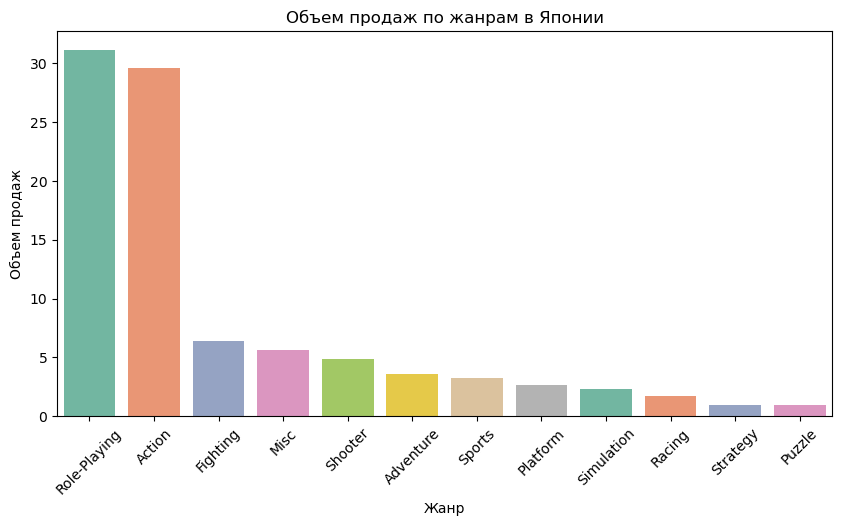

In [117]:
fig, ax = plt.subplots(figsize=(10,5))

na_sales_per_genre = data_new.pivot_table(index='genre',
                                          values='jp_sales',
                                          aggfunc = 'sum').sort_values(by='jp_sales',ascending=False).reset_index()
sns.barplot(data=na_sales_per_genre, x='genre',y='jp_sales', palette='Set2')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж')
plt.title('Объем продаж по жанрам в Японии')
plt.xticks(rotation=45)
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
sns.lineplot(data=data_new, x='year_of_release', y='jp_sales', hue='genre',estimator='mean', \
            style='genre', ci=None, markers=True,dashes=False, palette='Set2')
ax.set_xticks(range(2014,2017)),
plt.xlabel('год')
plt.ylabel('объем средних продаж, млн. копий')
plt.title('Динамика средних продаж по жанрам в Японии (2014-2016 гг.)')
plt.show();

In [118]:
data_new.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)

,jp_sales
rating,
absent,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


**В Японии игры, у которых не указан рейтинг, занимают первое место по объему продаж. Следовательно, в этой регионе рейтинг не влияет на продажи.**

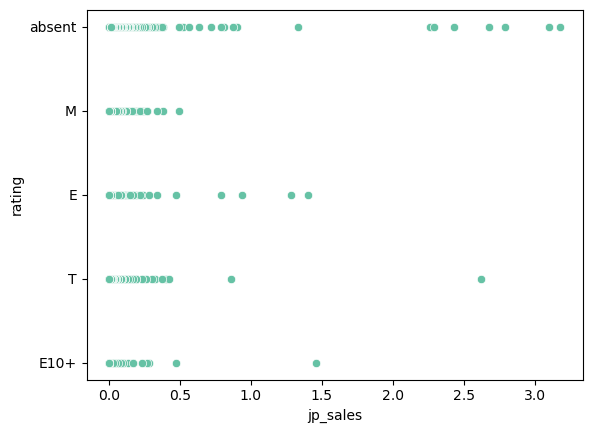

In [119]:
sns.scatterplot(data=data_new, x='jp_sales', y='rating',color='#66c2a5');

**В Японии наиболее популярными платформами в актуальный период были 3DS, WiiU, PS3, PSV и PS4. При выборе жанра пользователи в наибольшей мере отдавали предпочтение ролевым играм (RPG), головоломкам, файтинг-играм, экшену и платформерам. В Японии рейтинг не влияет на продажи, так как самой прибыльной группой игр является та, у игр которой нет рейтинга.**

### Шаг 5. Проверка гипотез

In [120]:
data_new.user_score.unique()

array([nan, 8.3, 4.3, 5.7, 5. , 6.5, 9.1, 6.1, 7.9, 5.4, 8.1, 6.4, 3.4,
       8.5, 4.8, 4.9, 4.5, 6.2, 8.4, 6.3, 7.7, 9.2, 7.6, 8.7, 6.7, 7. ,
       4.1, 8.2, 6.8, 5.5, 7.5, 4.4, 5.9, 7.2, 6.9, 3.9, 4.2, 3.2, 8.6,
       3.1, 9. , 7.3, 7.4, 6. , 4.7, 7.1, 8.8, 5.1, 6.6, 3. , 5.8, 2.9,
       8.9, 2.7, 8. , 3.5, 7.8, 5.2, 5.6, 4.6, 3.3, 9.3, 4. , 3.6, 3.7,
       2.4, 2.8, 5.3, 1.7, 1.6, 3.8, 1.5, 0.7, 2.5, 2. , 2.1, 0.2, 1.9,
       1.4, 2.3], dtype=float32)

In [121]:
data_new.user_score

31       NaN
42       8.3
47       NaN
77       4.3
87       NaN
        ... 
16703    NaN
16707    NaN
16710    NaN
16712    NaN
16714    NaN
Name: user_score, Length: 1689, dtype: float32

In [122]:
data_no_nan = data_new[data_new['user_score'].notna()].reset_index()

**Проверим гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".**

**Сначала сформулируем нулевую гипотезу - "Средние пользовательские рейтинги платформ Xbox One и PC равны". В данном случае мы сформулируем двустороннюю альтернативную гипотезу, так как исходя из гипотезы нулевой, у нас нет цели подвердить, что какая-либо из платформ получила более высокие или, наоборот, более низкие оценки от пользователей. Она звучит следующим образом: "Средние пользовательские рейтинги платформ Xbox One и PC не равны".**

**Для проверки гипотезы найдем совокупности значений пользовательских рейтингов игр, выпущенных платформами Xbox One и PC. Поскольку рассматривается гипотезе о равенстве среднего двух независимых генеральных совокупностей, мы используем метод st.ttest_ind.**

**Результат теста интерпретируется следующим образом:несмотря на то, что средние пользовательские рейтинги жанров не совпадают, с вероятностью в 10 % можно случайно получить такое или большее различие. Таким образом, нельзя сделать вывод о существенном различим между средними оценками жанров от пользователей.**

In [123]:
Xbox_one = data_no_nan.loc[(data_no_nan['platform'] == 'XOne')& (data_no_nan['user_score'] > 0)]['user_score']
PC = data_no_nan.loc[(data_no_nan['platform'] == 'PC') & (data_no_nan['user_score'] > 0)]['user_score']


alpha = .05 #критический уровень статистической значимости
        

results = st.ttest_ind(
    Xbox_one, 
    PC)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.10450648833224654
Не получилось отвергнуть нулевую гипотезу


**Перейдем к проверке гипотезы "Средние пользовательские рейтинги жанров Action и Sports разные".**

**Сформрулируем гипотезу Н₀ следующим образом: "Средние пользовательские рейтинги платформ жанров Action и Sports равны". По аналогии с первой гипотезой альтернативная Н₁ будет двусторонней. Ее формулировка- "Средние пользовательские рейтинги жанров не равны".**

**В результате теста былот получено крайне низкое P-значение ( 2.871146400695882e-19); полученная вероятность ошибки при отклонении нулевой гипотезы значительно меньше зафиксированного нами уровня значимости (1%). Следовательно, нулевую гипотезу стоит опровергнуть.**

In [124]:

action = data_no_nan.loc[(data_no_nan['genre'] == 'Action') & (data_no_nan['user_score'] > 0)]['user_score']
sports = data_no_nan.loc[(data_no_nan['genre'] == 'Sports') & (data_no_nan['user_score'] > 0)]['user_score']
                                  
                         
alpha = .01 # критический уровень статистической значимости
        

results = st.ttest_ind(
    action, 
    sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.871146400695882e-19
Отвергаем нулевую гипотезу


### Выводы

    Для того, чтобы изучить исследовать продажи компьютерных игр в период с 1980 по 2016 гг. и наих основании сделать прогноз на 2017 г., в исследовании были предриняты следующие шаги:
    
    - предобработка данных, включавшаяся в себя выявление пропусков в значениях и изменение типа данных в нескольких 
    столбцах;
    - добавление в таблицу нового столбца с глобальными продажами для того, чтобы углубить исследование закономерностей
    на рынке недвижимости;
    - построение гистограмм для изучения распределения значений выпущенных игр в зависимости от года;
    - выявление 5 платформ с наибольшими суммарными продажами, а также построение гистограммы (для визуализации 
    распределения значений по годам) и линейного графика (для визуализации динамики продаж) с их значениями в период
    с 2000 по 2016 гг.; 
    - выявление средней продолжительности "жизни" платформ;
    - выявление актуального приода, на основе которого в дальнейшем будет сделан прогноз на 2017 г.;
    - построение гистограммы для изучения распределения значений суммарных продаж платформ в актуальный период 
    (2013-2016 гг.) и линейного графика для исследования динамики средних продаж в тот же период;
    - построение диаграммы размаха по глобальным продажам игр в актуальный период в разбивке по платформам;
    - построение диаграмм рассеивания для изучения взаимосвязи между глобальными продажами, а также оценками
    критиков и пользователей;
    - построение гистограммы для изучения распределения игр по жанрам в актуальный период, а также линейного графика
    для визуализации динамики продаж в зависимости от жанра; 
    - создание сводных таблиц для выявления топ-5 платформ для каждого отдельного региона и изучения взаимосвязи между 
    рейтингом и продажами, а также построение линейных графиков для изучения динамики продаж в регионах;
    - построение гистограмм для выявления самых популярных жанров в каждом отдельном регионе; 
    - построение круговыз диаграм для выявления доли каждой платформы в общих продажах;
    - проверка гипотез при помощи метода st.ttest_ind().

   
   Вышеописанный алгоритм действий позволил выявить ряд закономерностей на рынке видеоигр. Во-первых, в период с 1980 по 2008 гг. происходило увеличение количества выпускаемых игр; начавшееся в 2009 г. снижение количества релизов в данном исследовании объясняется "великой рецессией" 2008-2009 гг. Был установлен нисходящий тренд в 2009-2016 гг.Отсутствуют признаки того, что данная тенденция прекратится в ближайшие годы, в связи с этим можно утверждать, что релизов не будет становиться больше в ближайшие годы: в лучшем случае будет происходить стагнация, а в худшем - сокращение числа релизов продолжится. Во-вторых, в ходе исследование удалось установить, что средняя продолжительность "жизни" каждой платформы в среднем составляет около 10 лет. 
     
   При выборе актуального периода учитывались описанные выше выводы. Поскольку в 2012 г. темпы снижения количества релизов ускорились, было принято решение взять для анализа только те годы, которые последовали после резкого сокращения релизов - 2014-2016 гг. В обозначенный актуальный период самыми прибыльными платформами были: PS4, PX360, а также 3DS и Xbox One. Стоит отметить cледующее: скорее всего, поскольку пик продаж платформы PS4 уже случился, в 2017 г. существует вероятность того, что она утратит лидерство в пользу Xbox One и WiiU. Поскольку последняя не входит в топ-5  всего актуального периода, можно утверждать, что в силу включения WiiU в топ-5 вследствие увеличения у нее объема как средних, так и суммарных продаж  в 2017 г. измененится список лидеров. 
     
   В ходе исследования было установлена, что между объемом продаж и отзывами критиков существует связь, однако она не досточно сильная. В случае некоторых платформ она де-факто вообще отсутствует.Помимо этого практически отсутствует корреляция между пользовательским рейтингом и объемом продаж. Игры как с низкими , так и с высокими имеют высокий рейтинг. Однако имеются случаи, когда у платформ с низкими продажами рейтинг был низким, в связи с чем незначительная взаимосвязь имеется. 
   
  Посредством исследовательского анализа данных удалось спрогнозировать успешность платформ в ближайшем будущем. Согласно нашему прогнозу, в 2017 г. самыми перспективными платформами будут PS4, 3DS, Xbox One, WiiU и Wii.
   
   При проверке гипотез был получен результат,гласящий,что статистические различя между средним пользовательским рейтингом платформ Xbox One и PC не статистически значимые. Во втором случае нулевая гипотеза была отвергнута, в связи с чем была принята гипотезу альтернативная: средние пользовательские рейтинги жанров Action и Sports равны.
   
   Были выявлены различия в предпочтениях пользователей из разных регионов. В Северной Америке и Европе самые популярные платформы совпадают, однако топ-5 платформ сформирован в этих регионах по-разному. В Америке Xbox One являтся лидером, а в Европе находится на третьем месте. Также в Северной Америке X360 располагается на втором месте, в то время как в Европе - на пятом. У регионов совпадают только платформы на четвертом месте: WiiU.В Японии лидером продаж является 3DS; помимо нее так же как и в Северной Америке и Европе в данной стране в топ-5 входbт такая платофрма PS4. При этом отличие заключается в том, что в Японии в топ-5 входят платформы PSV, 3DS и PS3.
     
   Во всех трех регионов в 2017 г. платформами-лидерами продаж будут те же самые платформы, которые занимали первое место на протяжении 4 лет. Таким образом, в Северной Америке и Европе платформой-лидером по-прежнему будут Xbox One и Wii соответственно, а в Японии - 3DS. Вероятность того, что во всех трех регионах платформы, занимающие третье место в 2016 г., смогут занять второе место, очень низкая: за один год трудно достичь такого значительного роста продаж. В списке самых популярных платформ в случае каждого региона изменения в 2017 г. могут произойти только с 4 и 5 местами: на это указывают небольшая разница в долях продаж в актуальный период г. 
   
   При анализе жанровых предпочтений пользователей удалось установить различия между регионами. В Северной Америке и Европе совпадают 3 самых популярных жанра: ими являются шутеры, спортивные игры и игры платфомеры. В регионах разнятся жанры, замыкающие пятерку лидеров: в то время как в Северной Америке четверотое и пятое место по популярности занимают экшен и ролевые игры (RPG), в Северной Америке -симуляционные игры и гонки. Так же как и в Северной Америке в Европе влияние рейтинга на продажи довольно ограничено. В Японии наиболее популярным жанром являются ролевые игры (RPG). Также в регионе, как и в остальных, популярны экшен-игры и платформеры. В отличие от Северной Америке и Европы, в Японии топ-5 жанров по популярности еще входят игры-головоломки.Аналогично платформам, жанры, занимающие первое, второе и, возможно, третье места в 2017 г. останутся прежними: произойдут изменения в жанрах на 4 и 5 месте по популярности. 
   
   
